# Linear, Ridge, Lasso and ElasticNet Regression Practical implementaion on Algerian Forest Fires Dataset

In [ ]:
Submitted by Rajan Kumar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Rajan\Downloads\Algerian_forest_fires_dataset_UPDATE.csv")

In [10]:
df.head(10)

day  month  year  Temperature   RH   Ws  Rain   FFMC   DMC    DC  ISI  \
0    1      6  2012           29   57   18    0.0  65.7   3.4   7.6  1.3   
1    2      6  2012           29   61   13    1.3  64.4   4.1   7.6  1.0   
2    3      6  2012           26   82   22   13.1  47.1   2.5   7.1  0.3   
3    4      6  2012           25   89   13    2.5  28.6   1.3   6.9  0.0   
4    5      6  2012           27   77   16    0.0  64.8   3.0  14.2  1.2   
5    6      6  2012           31   67   14    0.0  82.6   5.8  22.2  3.1   
6    7      6  2012           33   54   13    0.0  88.2   9.9  30.5  6.4   
7    8      6  2012           30   73   15    0.0  86.6  12.1  38.3  5.6   
8    9      6  2012           25   88   13    0.2  52.9   7.9  38.8  0.4   
9   10      6  2012           28   79   12    0.0  73.2   9.5  46.3  1.3   

    BUI  FWI    Classes    
0   3.4  0.5  not fire     
1   3.9  0.4  not fire     
2   2.7  0.1  not fire     
3   1.7  0.0  not fire     
4   3.9  0.5  not fire     
5   7.0  2.5      fire     
6  10.9  7.2      fire     
7  13.5  7.1      fire     
8  10.5  0.3  not fire     
9  12.6  0.9  not fire

In [5]:
df.shape

(244, 14)

In [7]:
#data is cleaned , since unnecessary rows has been already removed

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


In [11]:
#Adding new feature/column "Region"

df["Region"] = 0
for i in range(len(df)):
    if i >= 122:
        df["Region"][i] =1

In [12]:
df.head(10)

day  month  year  Temperature   RH   Ws  Rain   FFMC   DMC    DC  ISI  \
0    1      6  2012           29   57   18    0.0  65.7   3.4   7.6  1.3   
1    2      6  2012           29   61   13    1.3  64.4   4.1   7.6  1.0   
2    3      6  2012           26   82   22   13.1  47.1   2.5   7.1  0.3   
3    4      6  2012           25   89   13    2.5  28.6   1.3   6.9  0.0   
4    5      6  2012           27   77   16    0.0  64.8   3.0  14.2  1.2   
5    6      6  2012           31   67   14    0.0  82.6   5.8  22.2  3.1   
6    7      6  2012           33   54   13    0.0  88.2   9.9  30.5  6.4   
7    8      6  2012           30   73   15    0.0  86.6  12.1  38.3  5.6   
8    9      6  2012           25   88   13    0.2  52.9   7.9  38.8  0.4   
9   10      6  2012           28   79   12    0.0  73.2   9.5  46.3  1.3   

    BUI  FWI    Classes    Region  
0   3.4  0.5  not fire          0  
1   3.9  0.4  not fire          0  
2   2.7  0.1  not fire          0  
3   1.7  0.0  not fire          0  
4   3.9  0.5  not fire          0  
5   7.0  2.5      fire          0  
6  10.9  7.2      fire          0  
7  13.5  7.1      fire          0  
8  10.5  0.3  not fire          0  
9  12.6  0.9  not fire          0

In [13]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [15]:
#Need to strip the features 
df.columns = [co.strip() for co in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [16]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [18]:
#Now need to strip the data from Classes feature column
df['Classes'] = df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [19]:
#check the null values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.7+ KB


In [21]:
df.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI   Classes  Region  
0  0.5  not fire       0  
1  0.4  not fire       0  
2  0.1  not fire       0  
3  0.0  not fire       0  
4  0.5  not fire       0

In [23]:
#Observation All the values of Region is '0', Need to encode fire': 1, 'not fire': 0

# Using map function
df['Region'] = df['Classes'].map({'fire': 1, 'not fire': 0})

df.head(10)


day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0    1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1    2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2    3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3    4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4    5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
5    6      6  2012           31  67  14   0.0  82.6   5.8  22.2  3.1   7.0   
6    7      6  2012           33  54  13   0.0  88.2   9.9  30.5  6.4  10.9   
7    8      6  2012           30  73  15   0.0  86.6  12.1  38.3  5.6  13.5   
8    9      6  2012           25  88  13   0.2  52.9   7.9  38.8  0.4  10.5   
9   10      6  2012           28  79  12   0.0  73.2   9.5  46.3  1.3  12.6   

   FWI   Classes  Region  
0  0.5  not fire       0  
1  0.4  not fire       0  
2  0.1  not fire       0  
3  0.0  not fire       0  
4  0.5  not fire       0  
5  2.5      fire       1  
6  7.2      fire       1  
7  7.1      fire       1  
8  0.3  not fire       0  
9  0.9  not fire       0

In [24]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [25]:
df['Region'].unique()

array([0, 1], dtype=int64)

In [34]:
df = df.rename(columns = {'Region':'Classes_new'})
df.head(10)

day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0    1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1    2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2    3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3    4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4    5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
5    6      6  2012           31  67  14   0.0  82.6   5.8  22.2  3.1   7.0   
6    7      6  2012           33  54  13   0.0  88.2   9.9  30.5  6.4  10.9   
7    8      6  2012           30  73  15   0.0  86.6  12.1  38.3  5.6  13.5   
8    9      6  2012           25  88  13   0.2  52.9   7.9  38.8  0.4  10.5   
9   10      6  2012           28  79  12   0.0  73.2   9.5  46.3  1.3  12.6   

   FWI   Classes  Classes_new  
0  0.5  not fire            0  
1  0.4  not fire            0  
2  0.1  not fire            0  
3  0.0  not fire            0  
4  0.5  not fire            0  
5  2.5      fire            1  
6  7.2      fire            1  
7  7.1      fire            1  
8  0.3  not fire            0  
9  0.9  not fire            0

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Classes_new  244 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.7+ KB


In [38]:
#Adding new feature "date" by removing day, month and year features

df['date'] = pd.to_datetime(df[['day','month','year']])
df.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI   Classes  Classes_new       date  
0  0.5  not fire            0 2012-06-01  
1  0.4  not fire            0 2012-06-02  
2  0.1  not fire            0 2012-06-03  
3  0.0  not fire            0 2012-06-04  
4  0.5  not fire            0 2012-06-05

In [ ]:
#dropping day , month and year column
df.drop(['day','month','year'],axis=1, inplace=True)

In [42]:
df.head(10)

Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI   Classes  \
0           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5  not fire   
1           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4  not fire   
2           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1  not fire   
3           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0  not fire   
4           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5  not fire   
5           31  67  14   0.0  82.6   5.8  22.2  3.1   7.0  2.5      fire   
6           33  54  13   0.0  88.2   9.9  30.5  6.4  10.9  7.2      fire   
7           30  73  15   0.0  86.6  12.1  38.3  5.6  13.5  7.1      fire   
8           25  88  13   0.2  52.9   7.9  38.8  0.4  10.5  0.3  not fire   
9           28  79  12   0.0  73.2   9.5  46.3  1.3  12.6  0.9  not fire   

   Classes_new       date  
0            0 2012-06-01  
1            0 2012-06-02  
2            0 2012-06-03  
3            0 2012-06-04  
4            0 2012-06-05  
5            1 2012-06-06  
6            1 2012-06-07  
7            1 2012-06-08  
8            0 2012-06-09  
9            0 2012-06-10

In [43]:
df.shape

(244, 13)

In [44]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Classes_new', 'date'],
      dtype='object')

In [48]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Classes_new    0
date           0
dtype: int64

In [49]:
#Describe = used for statistics analysis
df.describe()

Temperature          RH          Ws        Rain        FFMC  \
count   244.000000  244.000000  244.000000  244.000000  244.000000   
mean     32.172131   61.938525   15.504098    0.760656   77.887705   
std       3.633843   14.884200    2.810178    1.999406   14.337571   
min      22.000000   21.000000    6.000000    0.000000   28.600000   
25%      30.000000   52.000000   14.000000    0.000000   72.075000   
50%      32.000000   63.000000   15.000000    0.000000   83.500000   
75%      35.000000   73.250000   17.000000    0.500000   88.300000   
max      42.000000   90.000000   29.000000   16.800000   96.000000   

              DMC          DC         ISI         BUI         FWI  Classes_new  
count  244.000000  244.000000  244.000000  244.000000  244.000000   244.000000  
mean    14.673361   49.288115    4.759836   16.673361    7.049180     0.565574  
std     12.368039   47.619662    4.154628   14.201648    7.428366     0.496700  
min      0.700000    6.900000    0.000000    1.100000    0.000000     0.000000  
25%      5.800000   13.275000    1.400000    6.000000    0.700000     0.000000  
50%     11.300000   33.100000    3.500000   12.450000    4.450000     1.000000  
75%     20.750000   68.150000    7.300000   22.525000   11.375000     1.000000  
max     65.900000  220.400000   19.000000   68.000000   31.100000     1.000000

In [50]:
df.describe().T

count       mean        std   min     25%    50%     75%    max
Temperature  244.0  32.172131   3.633843  22.0  30.000  32.00  35.000   42.0
RH           244.0  61.938525  14.884200  21.0  52.000  63.00  73.250   90.0
Ws           244.0  15.504098   2.810178   6.0  14.000  15.00  17.000   29.0
Rain         244.0   0.760656   1.999406   0.0   0.000   0.00   0.500   16.8
FFMC         244.0  77.887705  14.337571  28.6  72.075  83.50  88.300   96.0
DMC          244.0  14.673361  12.368039   0.7   5.800  11.30  20.750   65.9
DC           244.0  49.288115  47.619662   6.9  13.275  33.10  68.150  220.4
ISI          244.0   4.759836   4.154628   0.0   1.400   3.50   7.300   19.0
BUI          244.0  16.673361  14.201648   1.1   6.000  12.45  22.525   68.0
FWI          244.0   7.049180   7.428366   0.0   0.700   4.45  11.375   31.1
Classes_new  244.0   0.565574   0.496700   0.0   0.000   1.00   1.000    1.0

# Analysis on Data

In [55]:
#Exploring Data

#Numerical features and Categorical features

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numeric_features

['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes_new',
 'date']

In [54]:
len(numeric_features)
#Here we have 13 Numeric features also termed here as Independent features

13

In [57]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features
#Here we have Only 1 Categorical feature also termed here as Dependent feature

['Classes']

In [59]:
highest_temp = df.sort_values(by='Temperature', ascending=False)[['date', 'Rain', 'Temperature']].head()
highest_temp

date  Rain  Temperature
199 2012-08-17   0.0           42
193 2012-08-11   0.0           40
198 2012-08-16   0.1           40
184 2012-08-02   0.0           40
191 2012-08-09   0.0           39

In [60]:
lowest_temp = df.sort_values(by='Temperature', ascending=True)[['date', 'Rain', 'Temperature']].head()
lowest_temp

date  Rain  Temperature
105 2012-09-14   8.3           22
93  2012-09-02  10.1           22
243 2012-09-30   0.2           24
242 2012-09-29   0.1           24
106 2012-09-15   0.4           24

In [ ]:
#August month is the hottest month followed by july in the given data with highest recorded temperature is 42°C and September month is colder month with lowest recorded temperature is 22°C.
#September and June month received more rainfall than July and August month.
#Fine Fuel Moisture Code, Fire Weather Index, Buildup Index is high in August month when temperature in higher and low in September month when temperature is lower

In [64]:
df.corr()
#corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python. 
#Any NaN values are automatically excluded. Any non-numeric data type or columns in the Dataframe, it is ignored.

Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.654443 -0.278132 -0.326786  0.677491  0.483105   
RH             -0.654443  1.000000  0.236084  0.222968 -0.645658 -0.405133   
Ws             -0.278132  0.236084  1.000000  0.170169 -0.163255 -0.001246   
Rain           -0.326786  0.222968  0.170169  1.000000 -0.544045 -0.288548   
FFMC            0.677491 -0.645658 -0.163255 -0.544045  1.000000  0.602391   
DMC             0.483105 -0.405133 -0.001246 -0.288548  0.602391  1.000000   
DC              0.370498 -0.220330  0.076245 -0.296804  0.503910  0.875358   
ISI             0.605971 -0.688268  0.012245 -0.347862  0.740751  0.678355   
BUI             0.456415 -0.349685  0.030303 -0.299409  0.590251  0.982206   
FWI             0.566839 -0.580457  0.033957 -0.324755  0.691430  0.875191   
Classes_new     0.518119 -0.435023 -0.066529 -0.379449  0.770114  0.584188   

                   DC       ISI       BUI       FWI  Classes_new  
Temperature  0.370498  0.605971  0.456415  0.566839     0.518119  
RH          -0.220330 -0.688268 -0.349685 -0.580457    -0.435023  
Ws           0.076245  0.012245  0.030303  0.033957    -0.066529  
Rain        -0.296804 -0.347862 -0.299409 -0.324755    -0.379449  
FFMC         0.503910  0.740751  0.590251  0.691430     0.770114  
DMC          0.875358  0.678355  0.982206  0.875191     0.584188  
DC           1.000000  0.503919  0.941672  0.737041     0.507122  
ISI          0.503919  1.000000  0.641351  0.922422     0.736142  
BUI          0.941672  0.641351  1.000000  0.856912     0.584545  
FWI          0.737041  0.922422  0.856912  1.000000     0.719407  
Classes_new  0.507122  0.736142  0.584545  0.719407     1.000000

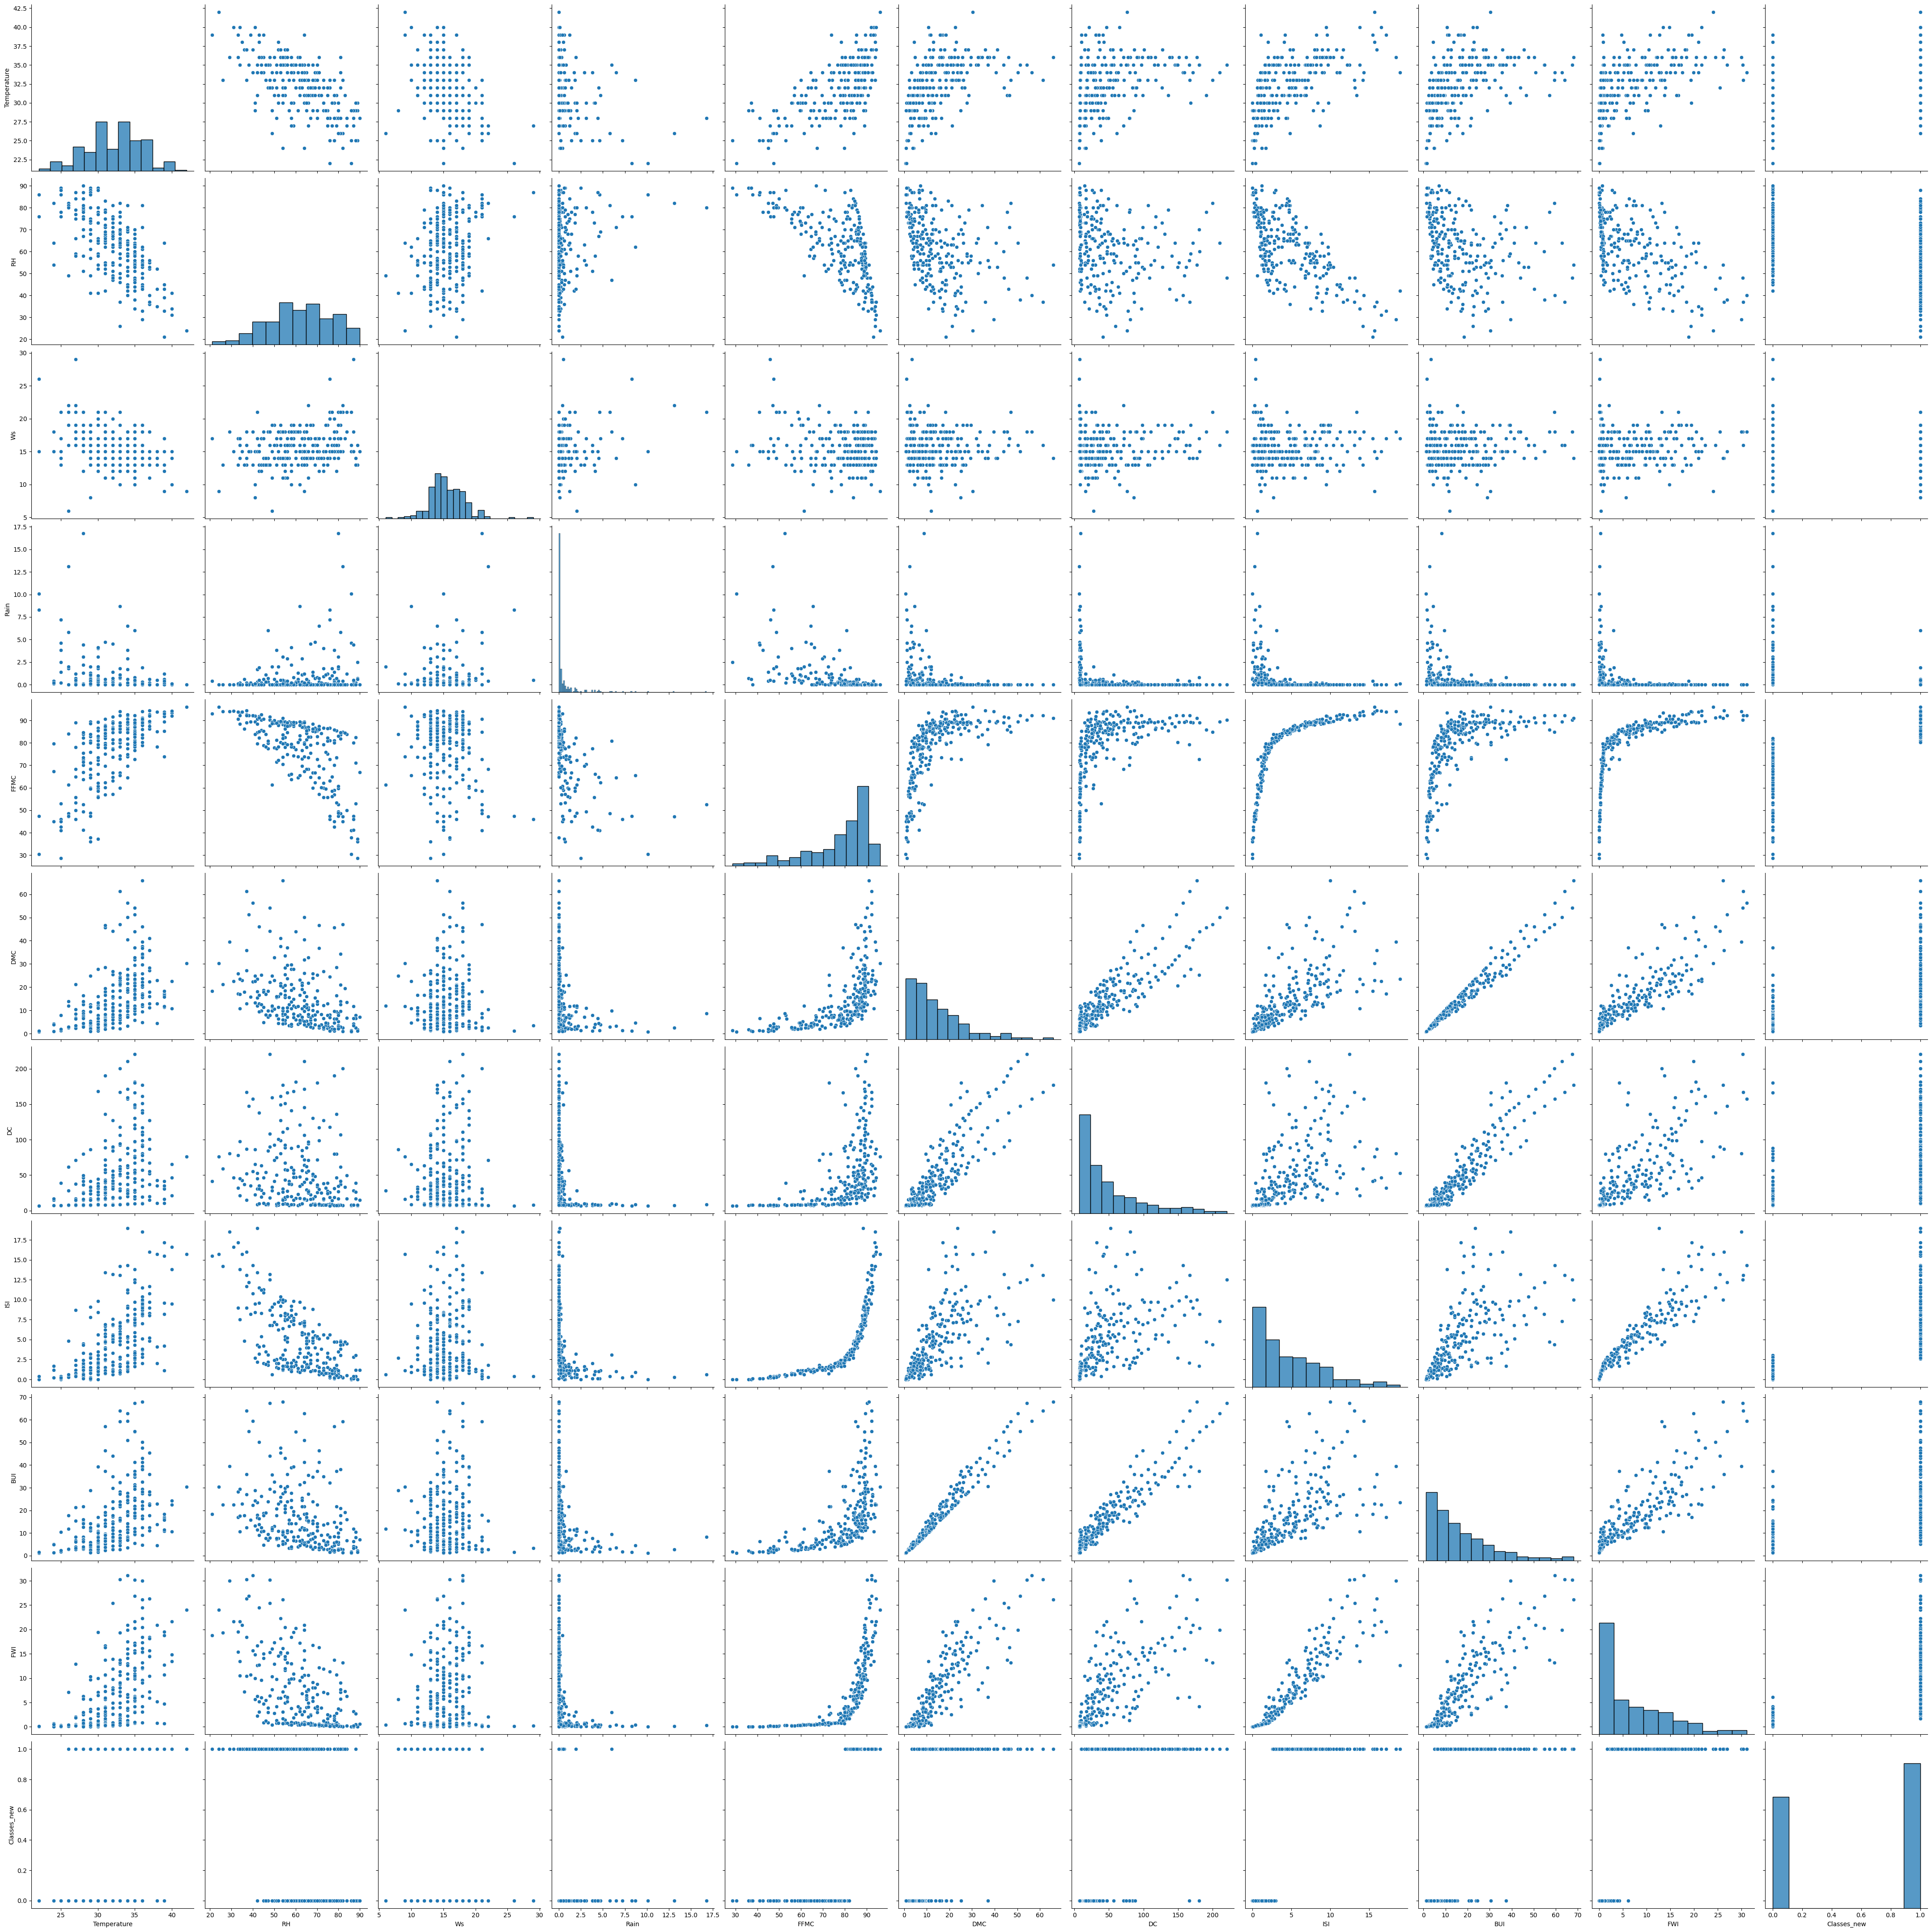

In [66]:
sns.pairplot(df,height=4)

<AxesSubplot:>

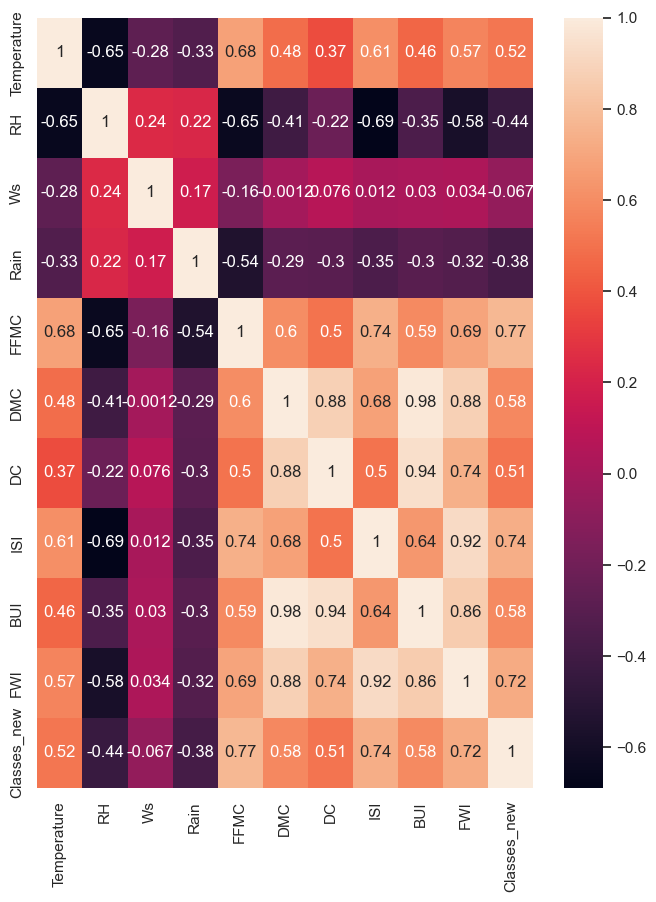

In [67]:
sns.set(rc={'figure.figsize':(8,10)})
sns.heatmap(df.corr(), annot = True)

# Univariate Analysis

In [62]:
df.var()

Temperature      13.204817
RH              221.539415
Ws                7.897102
Rain              3.997623
FFMC            205.565939
DMC             152.968382
DC             2267.632245
ISI              17.260932
BUI             201.686818
FWI              55.180617
Classes_new       0.246711
dtype: float64

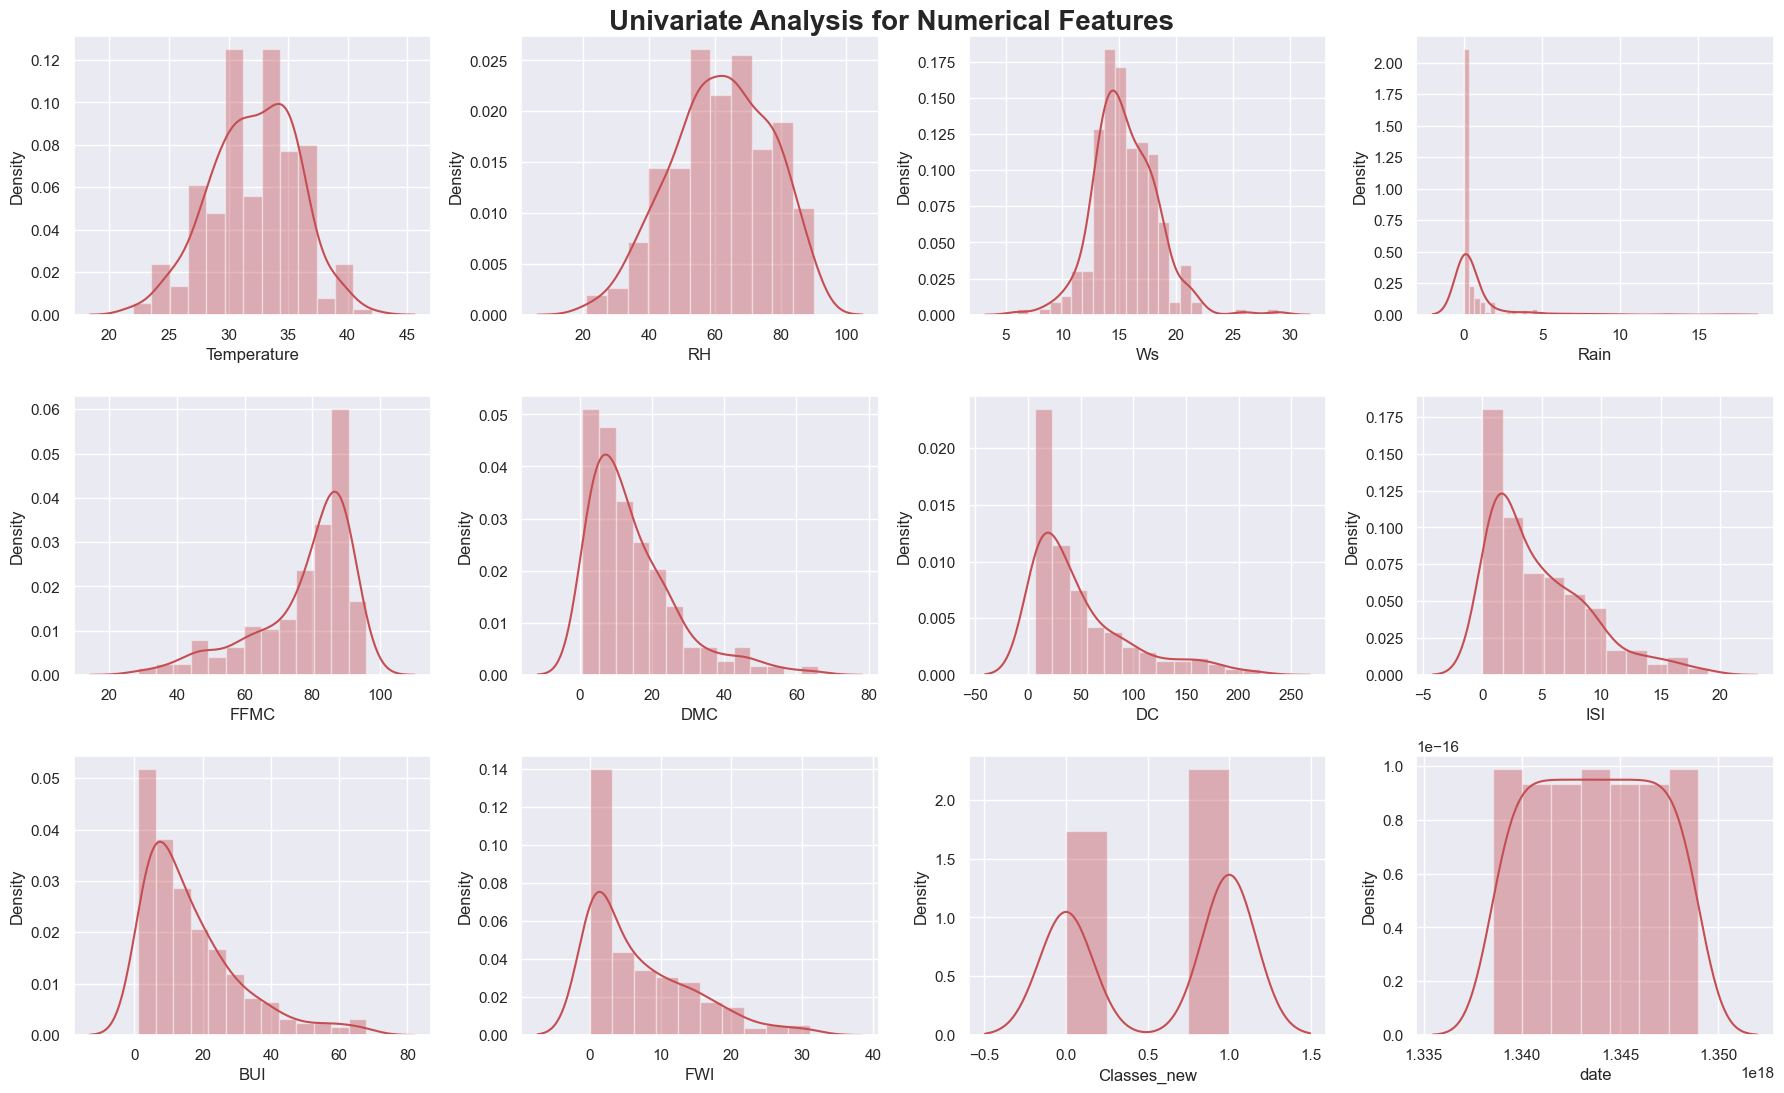

In [86]:
#Numerical Columns
plt.figure(figsize=(18,18))
plt.suptitle('Univariate Analysis for Numerical Features', fontsize=20,fontweight = 'bold')

for i in range(0, len(numeric_features)):
    plt.subplot(5,4,i+1)
    sns.distplot(x =df[numeric_features[i]],kde=True,color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    

Observation: 
1. Right Skewed : Rain, DMC, DC, ISI, BUI and FWI
2. Left Skewed : FFMC 
3. Normal Distribution : Temperature , RH and Date

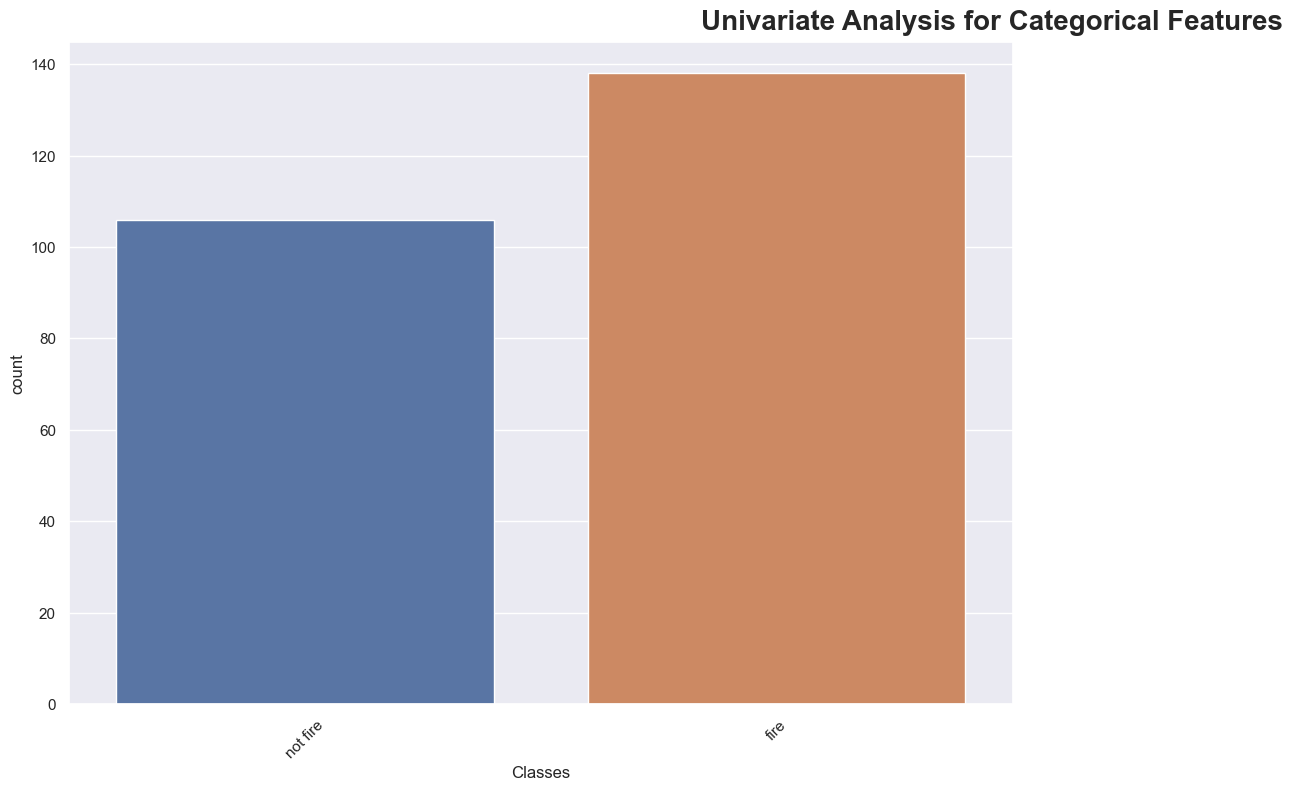

In [101]:
# categorical columns
plt.figure(figsize=(20, 15))

plt.suptitle('Univariate Analysis for Categorical Features', fontsize=20,fontweight = 'bold')

for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# Count Plot for Bivariate Analysis

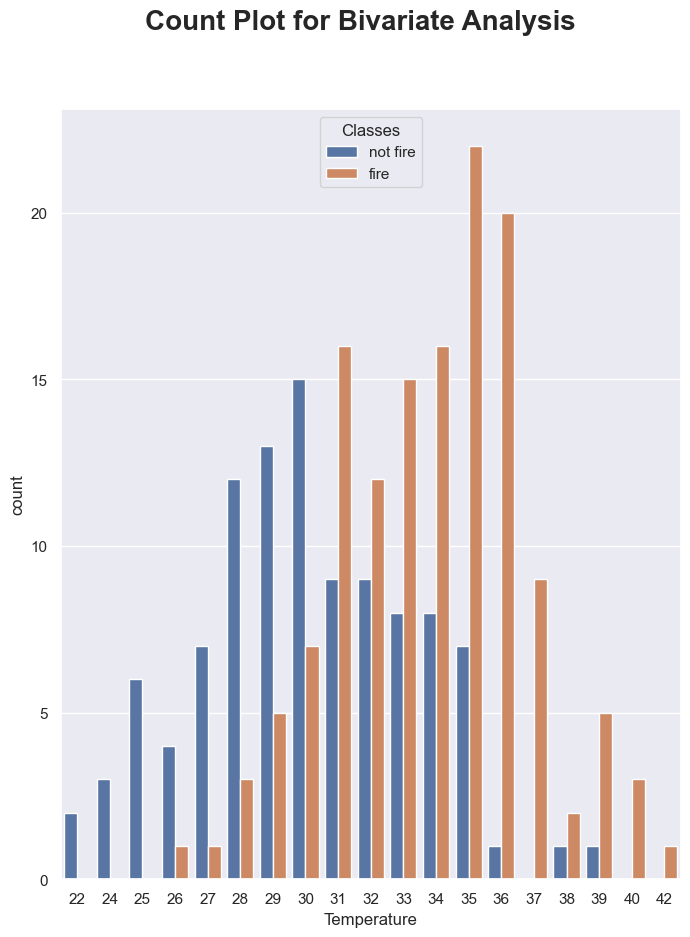

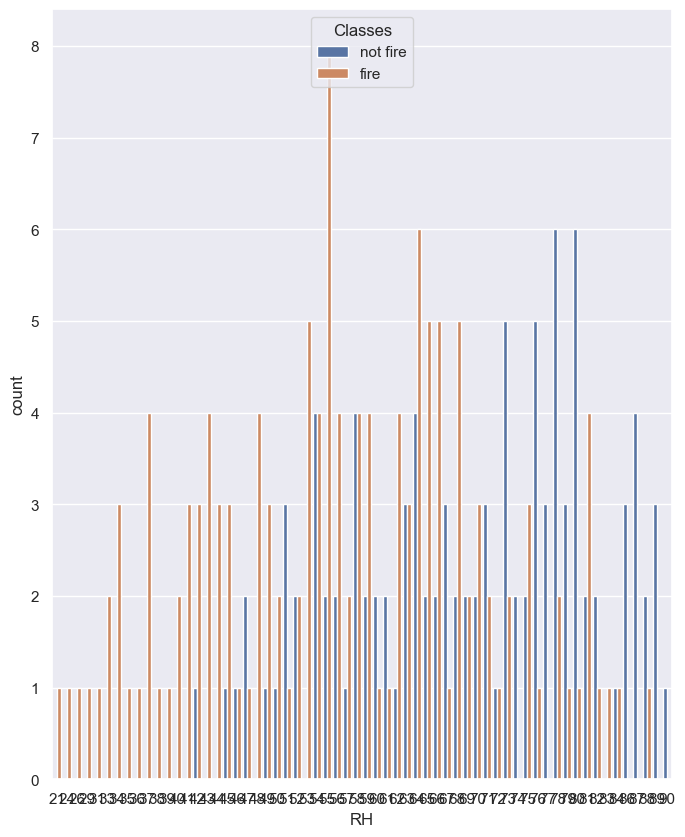

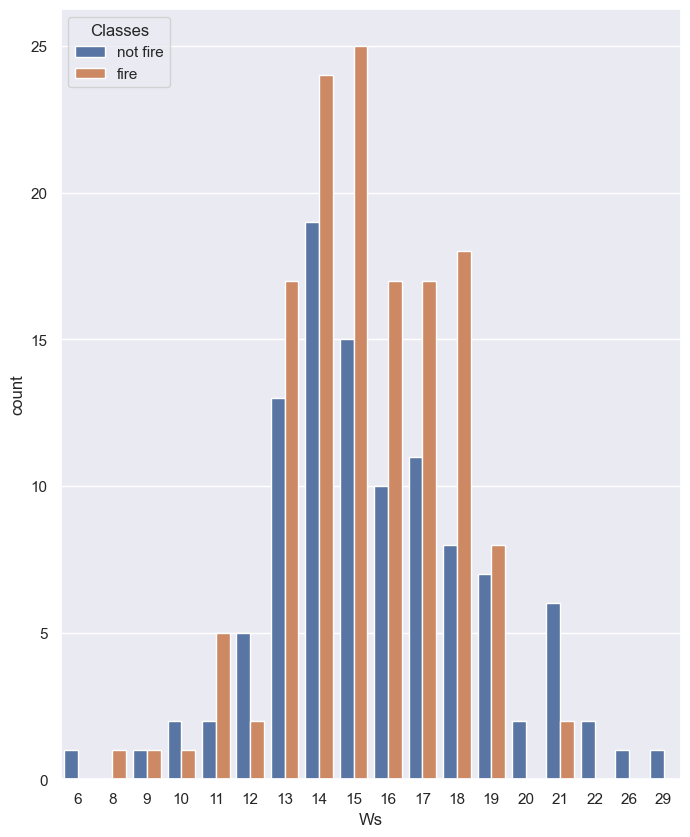

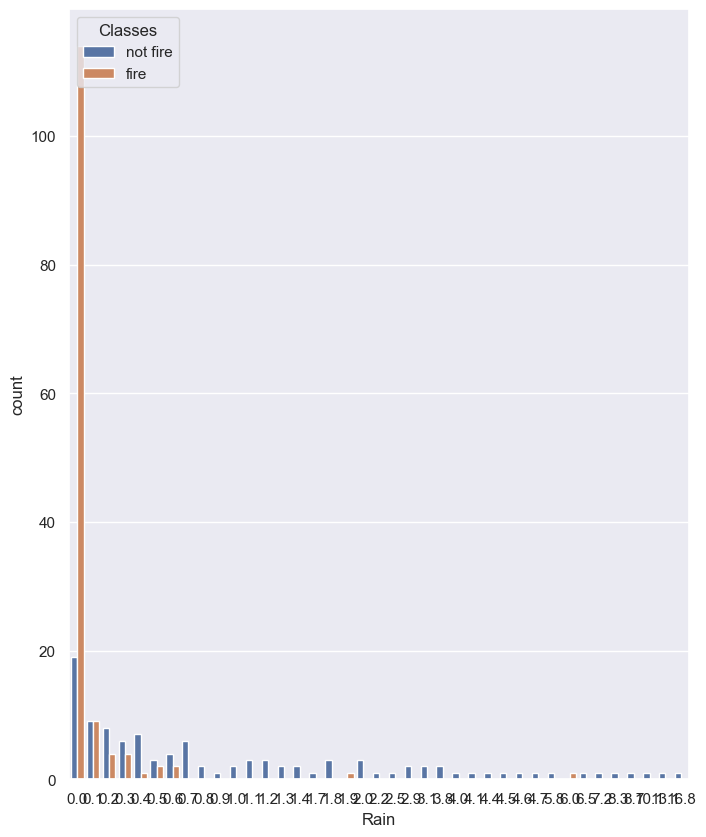

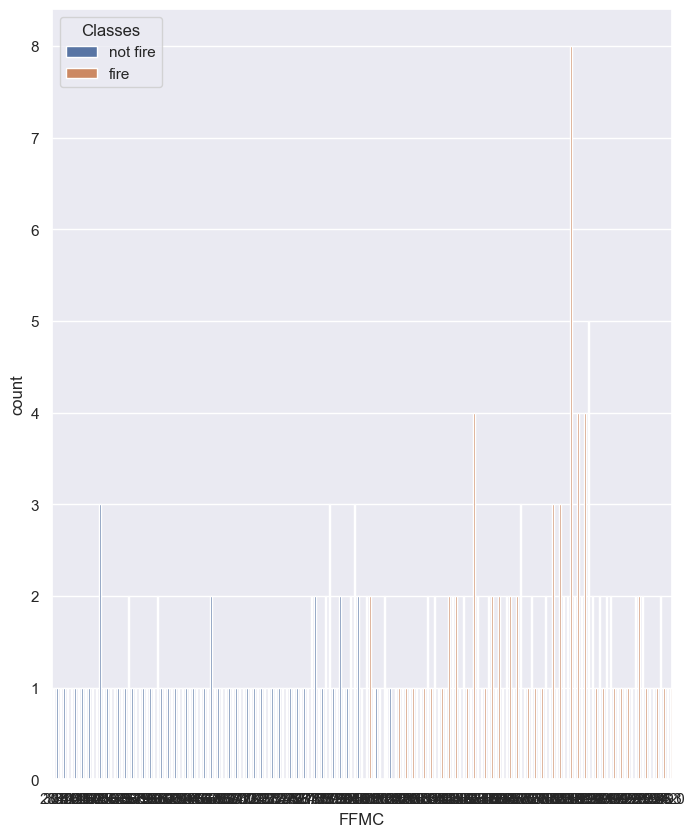

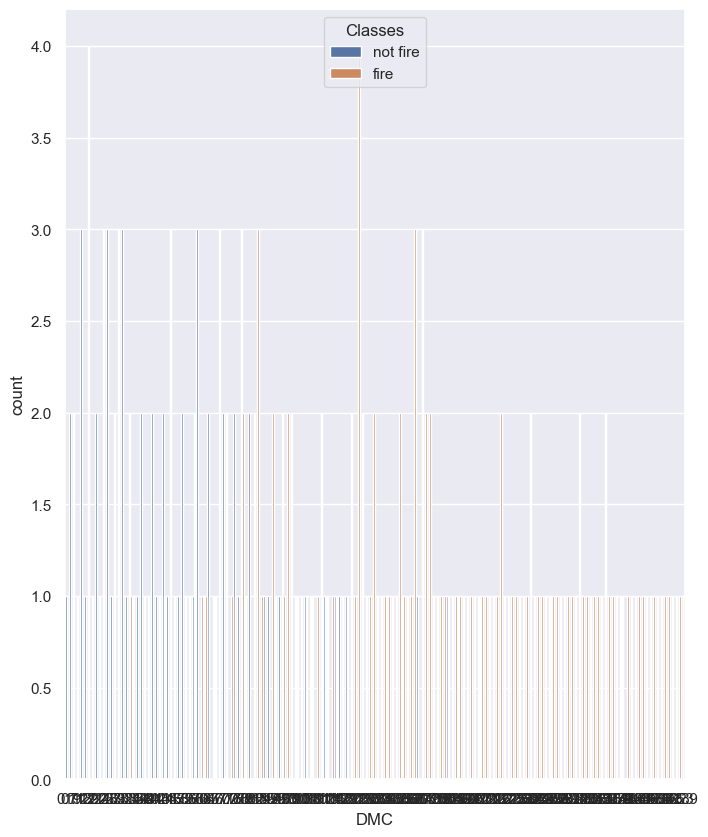

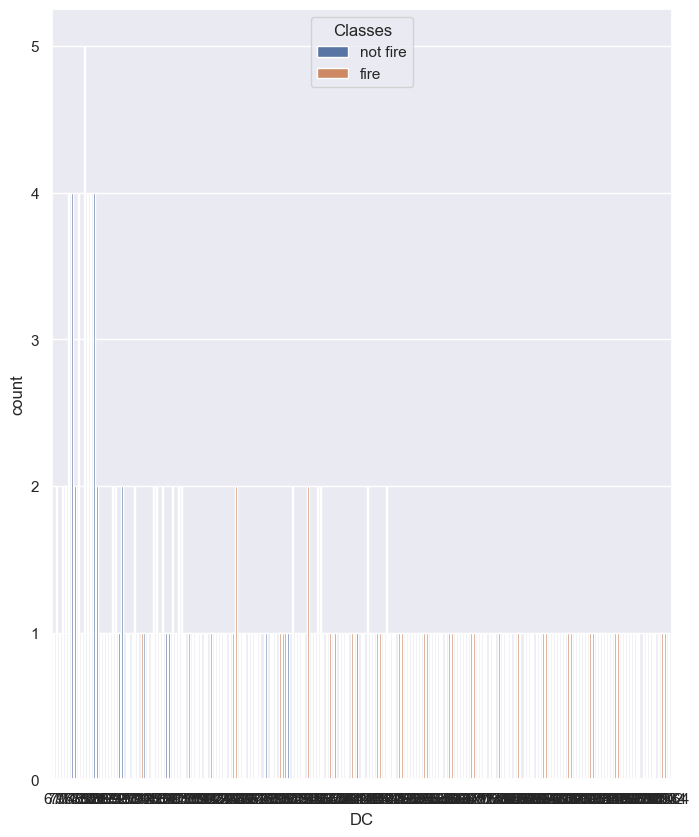

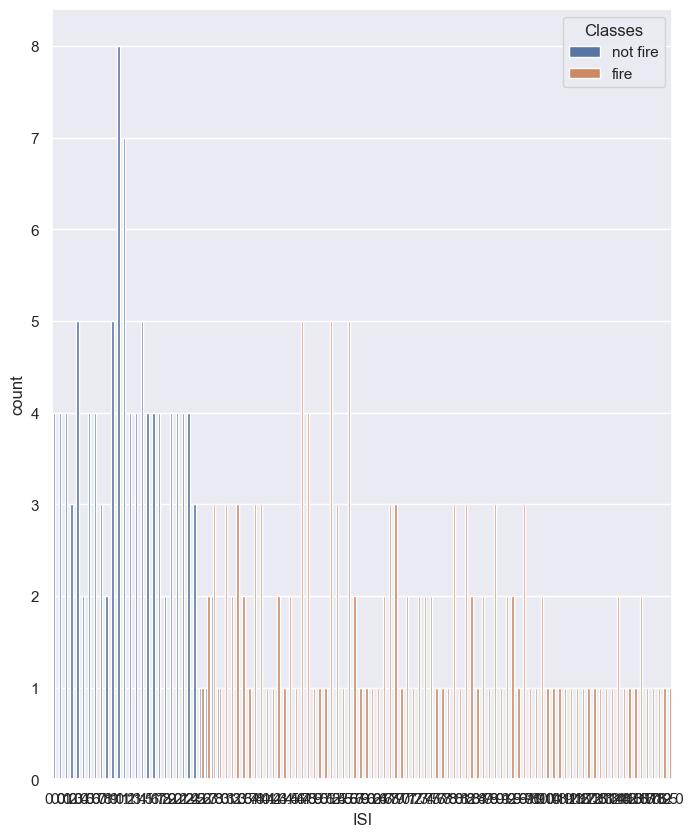

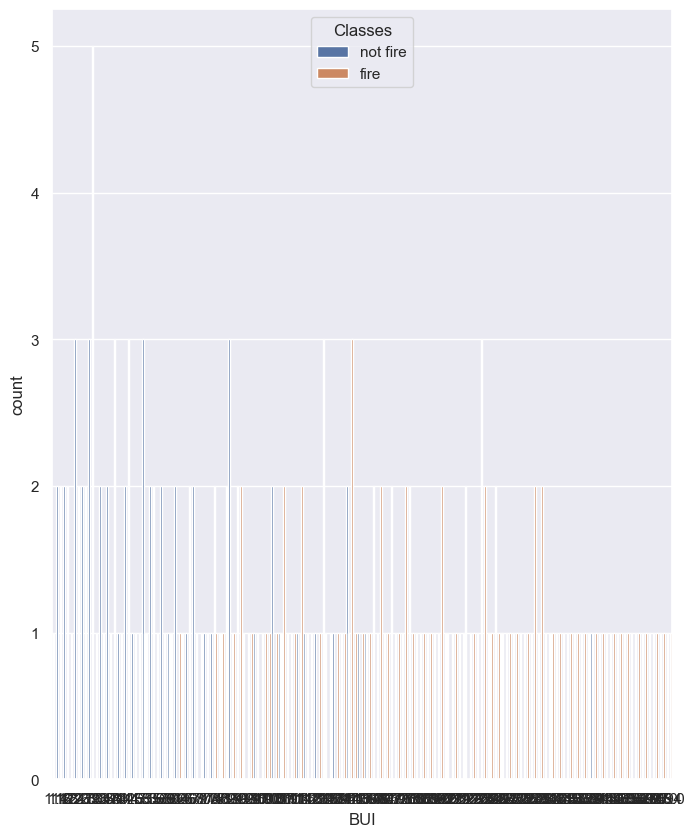

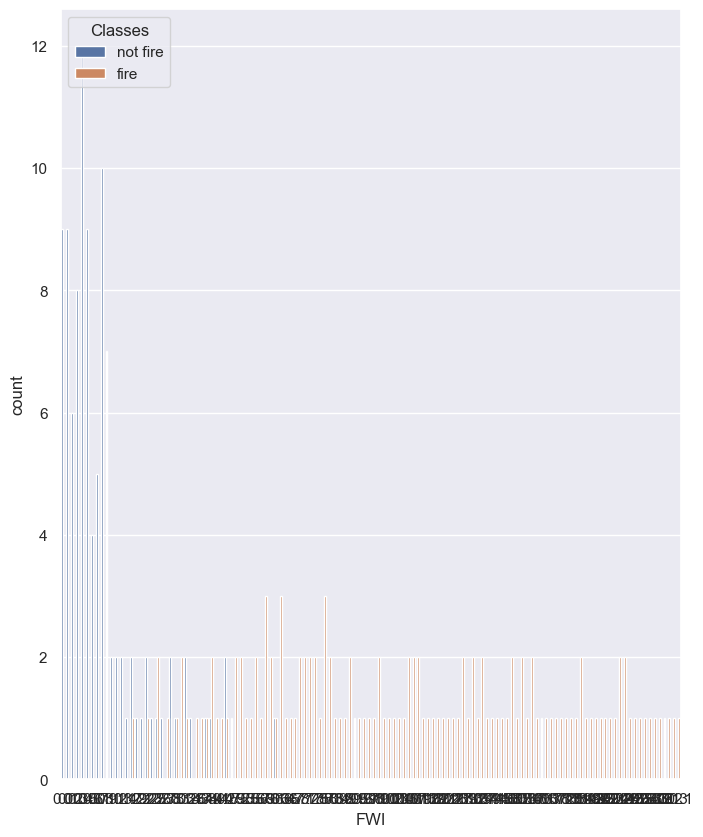

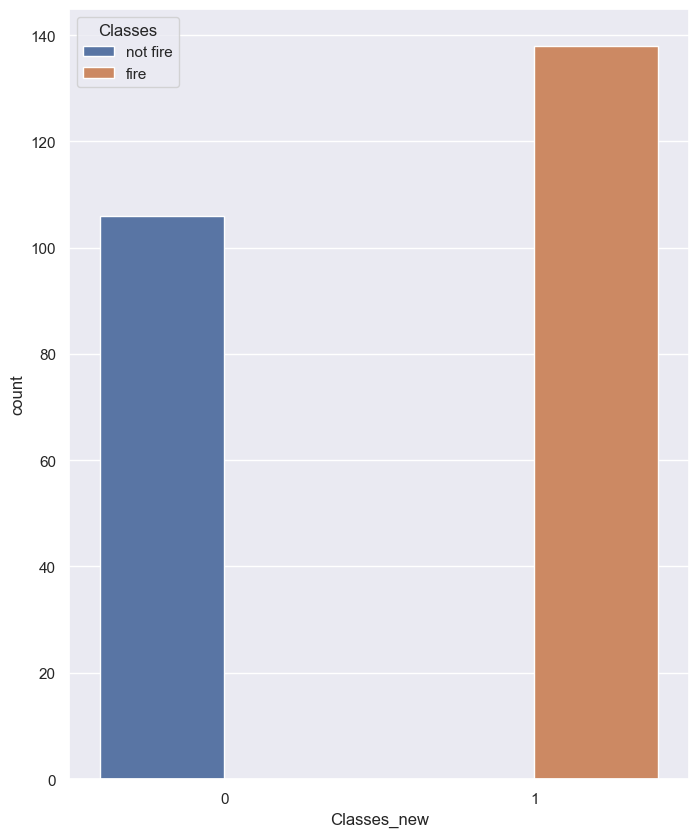

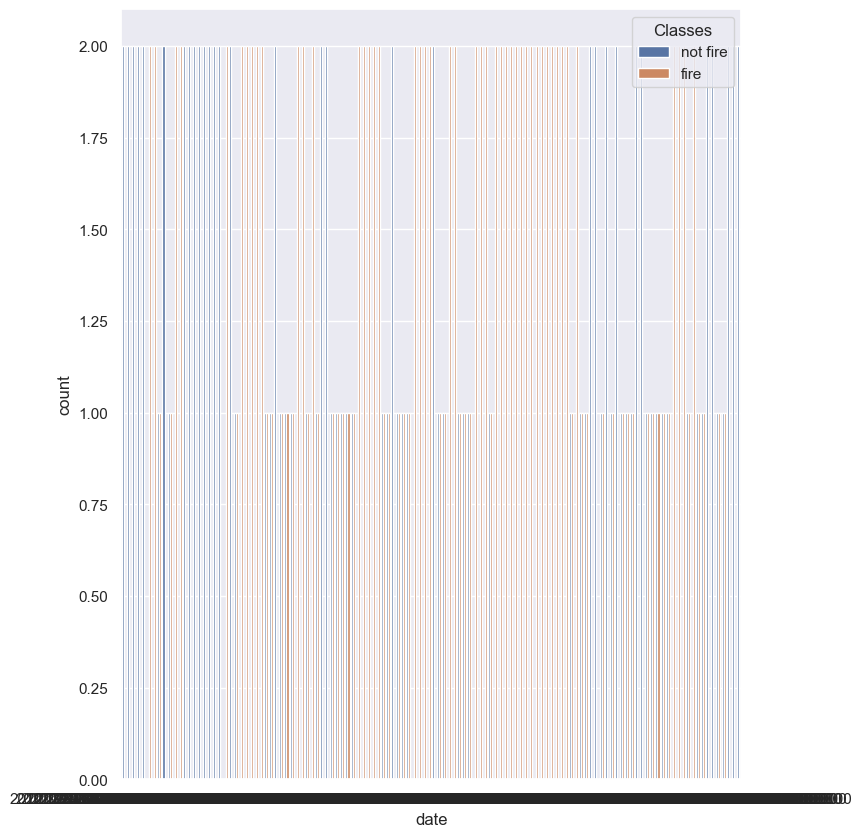

<Figure size 800x1000 with 0 Axes>

In [103]:
plt.suptitle('Count Plot for Bivariate Analysis', fontsize=20,fontweight = 'bold')
for feature in numeric_features:
    sns.countplot(data=df, x = feature, hue='Classes')
    plt.show()
    plt.tight_layout()

# Scatter plot for data trends for numerical features

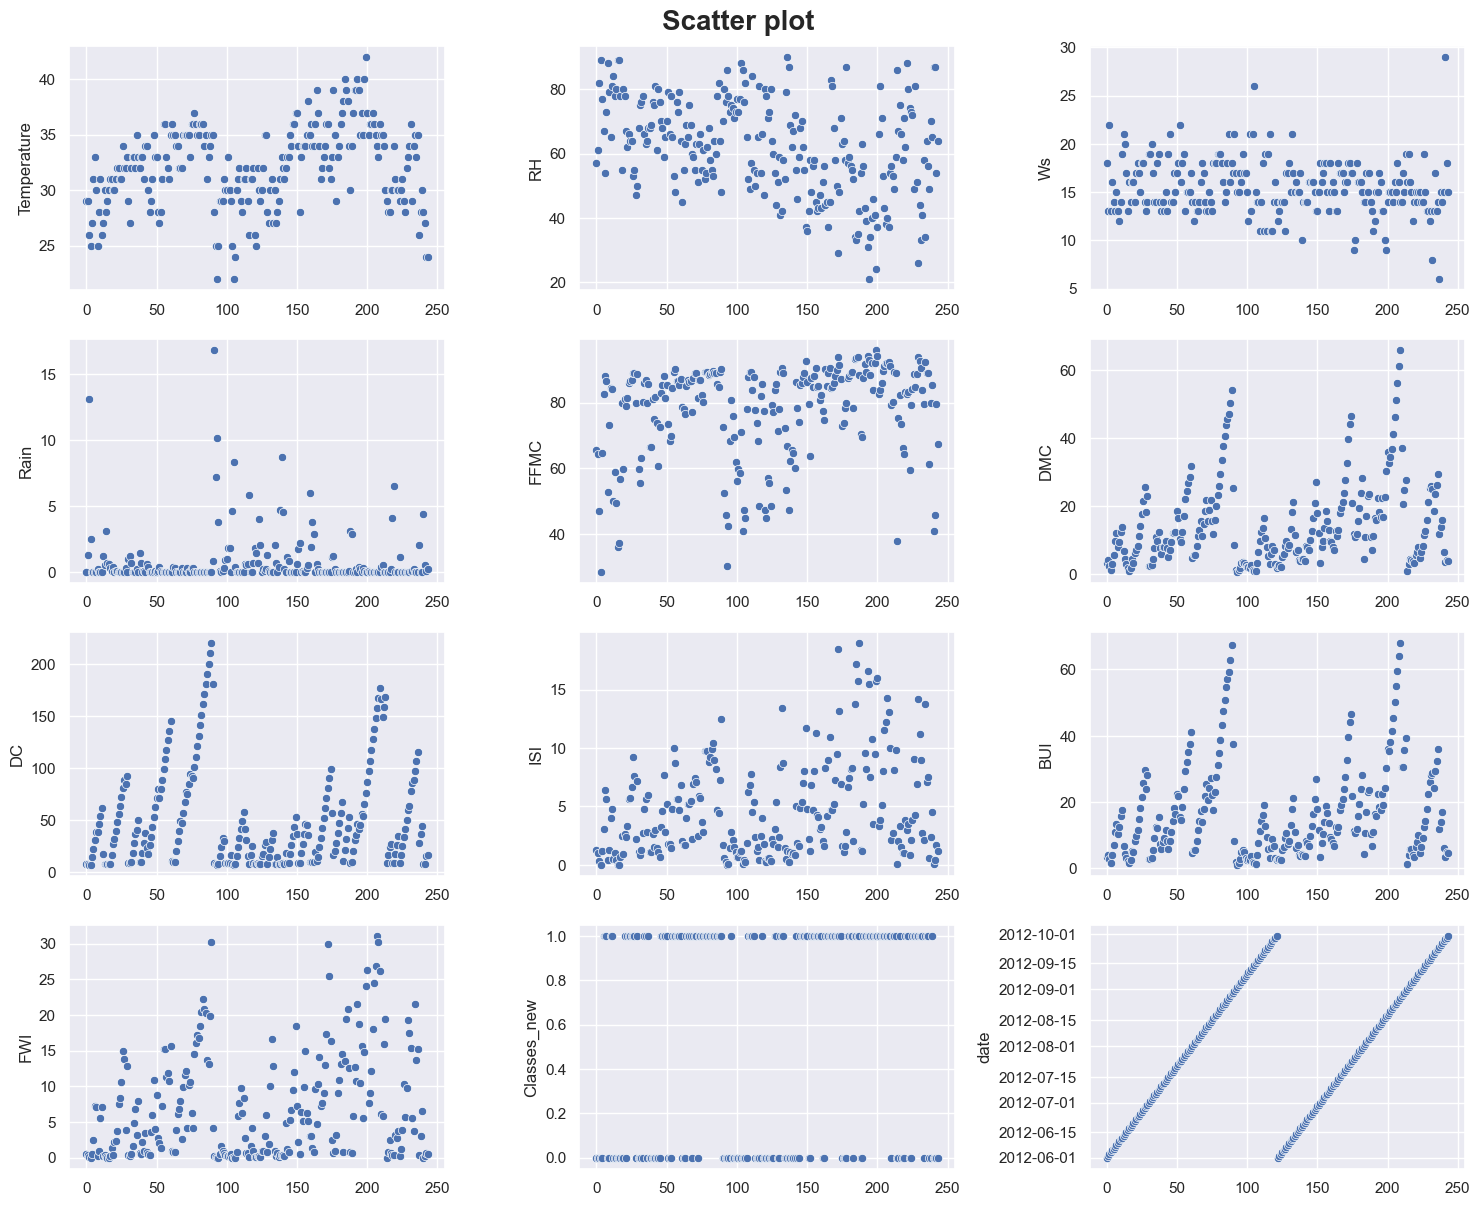

In [104]:

plt.figure(figsize=(15,15))
plt.suptitle('Scatter plot', fontsize=20,fontweight = 'bold')
for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(x=df.index, y=numeric_features[i],data=df)
    plt.tight_layout()

# Strip Plot on the basis of Temperature to other features

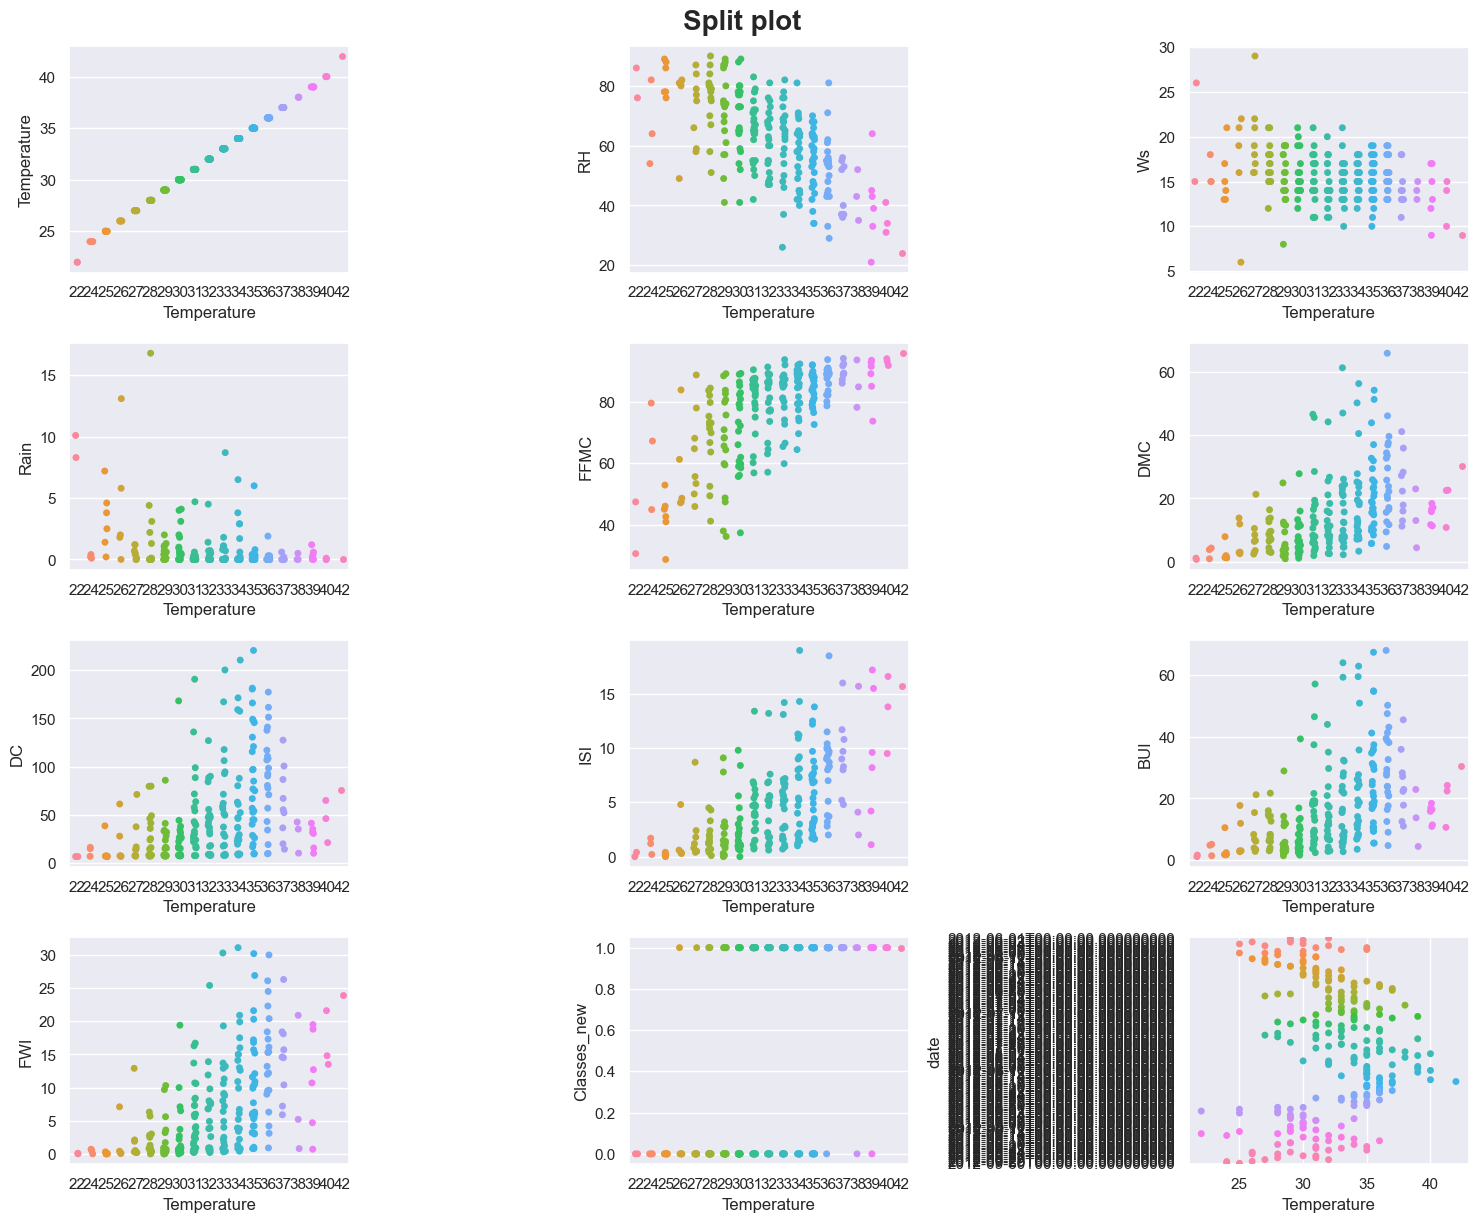

In [105]:
plt.figure(figsize=(15,15))
plt.suptitle('Split plot', fontsize=20,fontweight = 'bold')
for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.stripplot(x='Temperature', y=numeric_features[i],data=df)
    plt.tight_layout()

# BoxPlot to check the outliers

<AxesSubplot:xlabel='FFMC'>

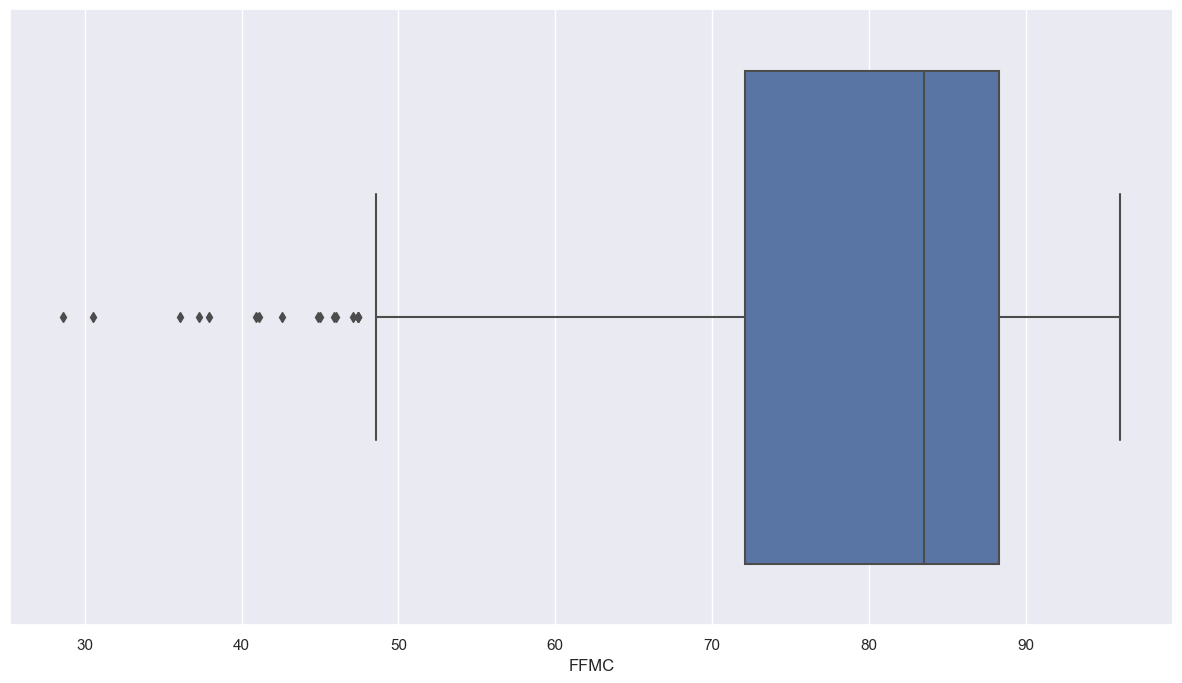

In [108]:
plt.figure(figsize=(15,8))
sns.boxplot(df['FFMC'])

<AxesSubplot:>

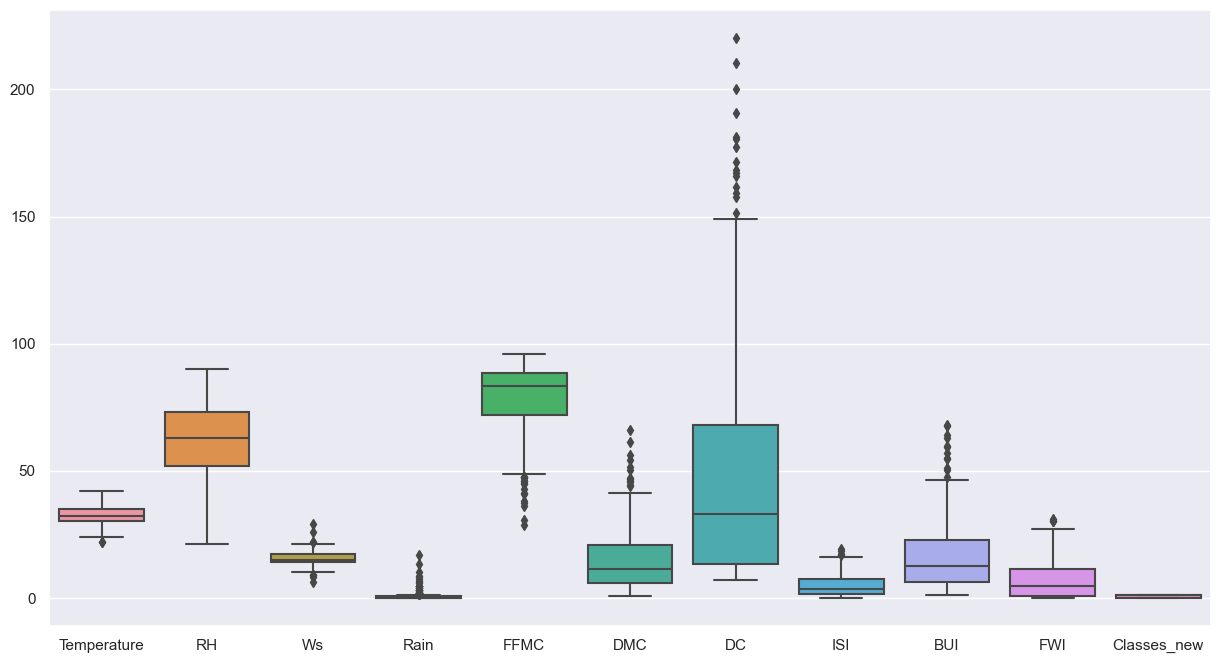

In [109]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)

Here All the features have outliers except Classes and RH

# Linear Regression

<AxesSubplot:xlabel='RH', ylabel='Temperature'>

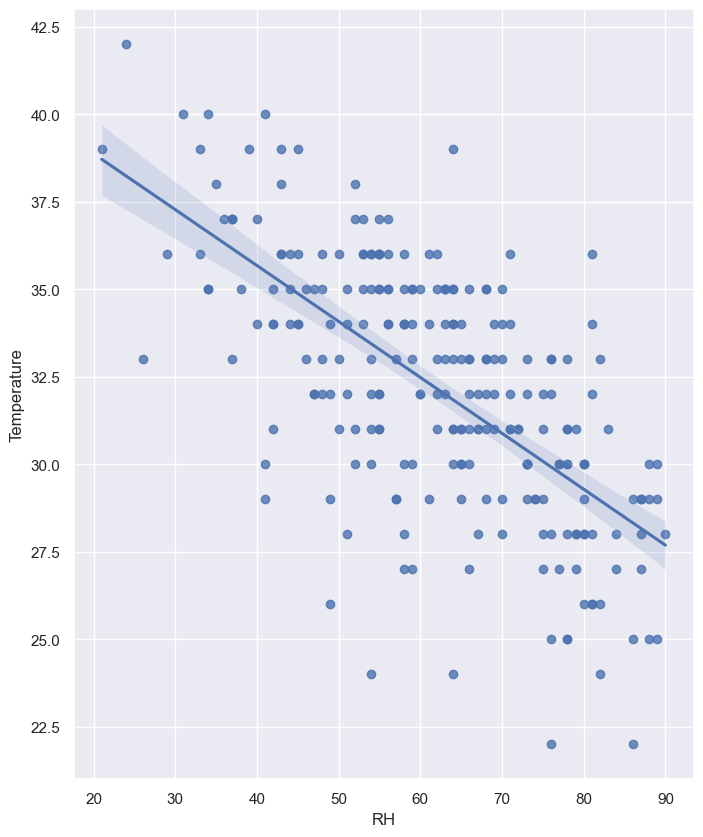

In [110]:
#rh vs temperature
sns.regplot(x='RH',y='Temperature', data=df)

<AxesSubplot:xlabel='Ws', ylabel='Temperature'>

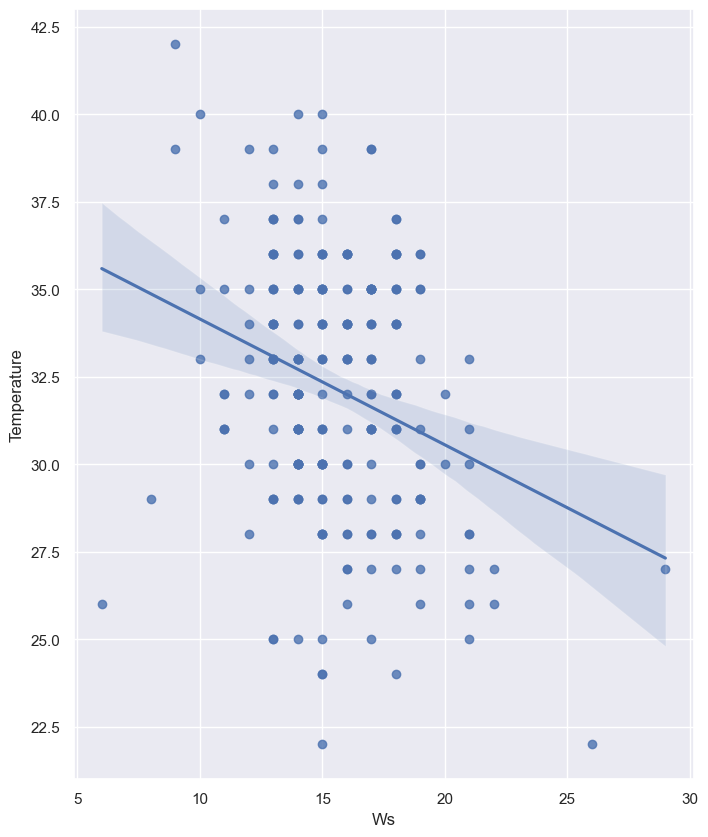

In [112]:
#ws vs temperature
sns.regplot(x='Ws', y='Temperature',data=df)

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

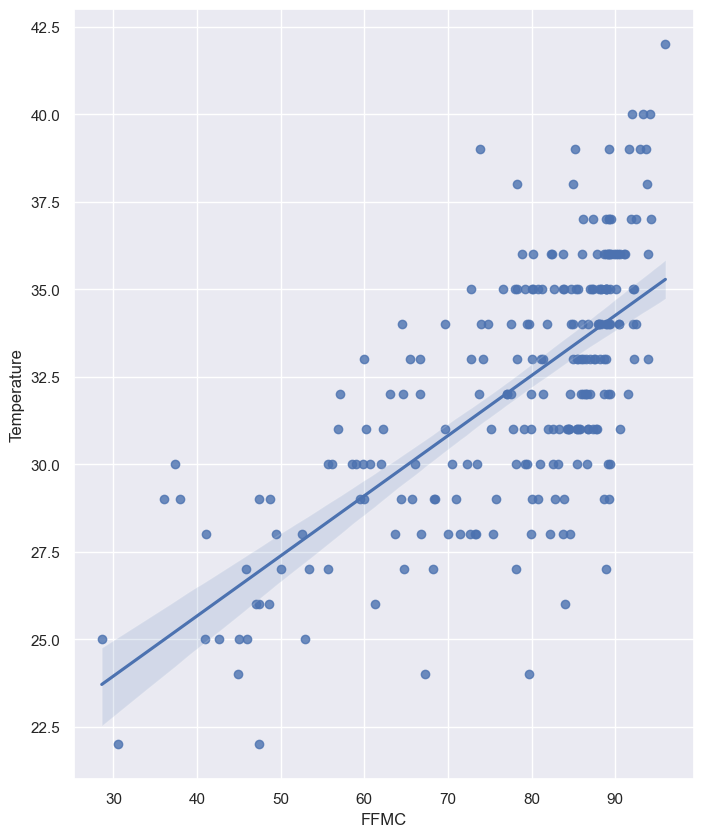

In [113]:
#ffmc vs temperature
sns.regplot(x='FFMC', y='Temperature', data = df)

<AxesSubplot:xlabel='Rain', ylabel='Temperature'>

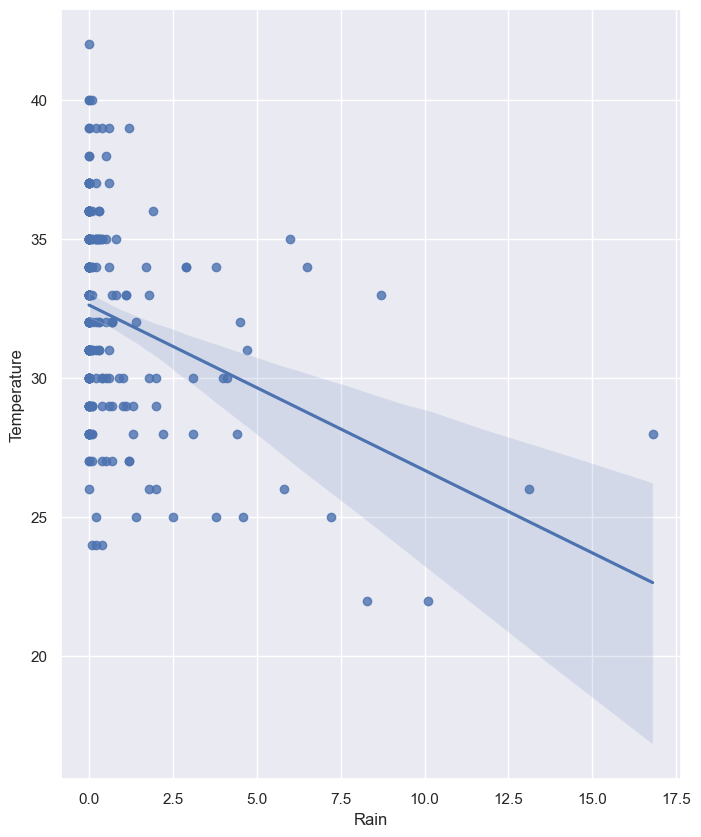

In [117]:
#rain vs temperature
sns.regplot(x='Rain', y='Temperature', data = df)

<AxesSubplot:xlabel='DMC', ylabel='Temperature'>

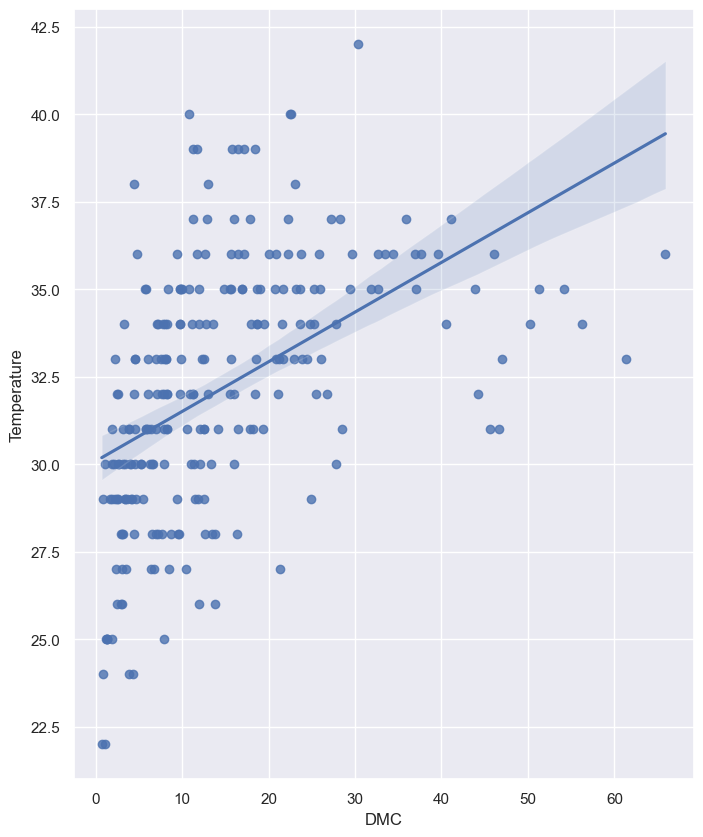

In [118]:
#dmc vs temperature
sns.regplot(x='DMC', y='Temperature', data = df)

<AxesSubplot:xlabel='DC', ylabel='Temperature'>

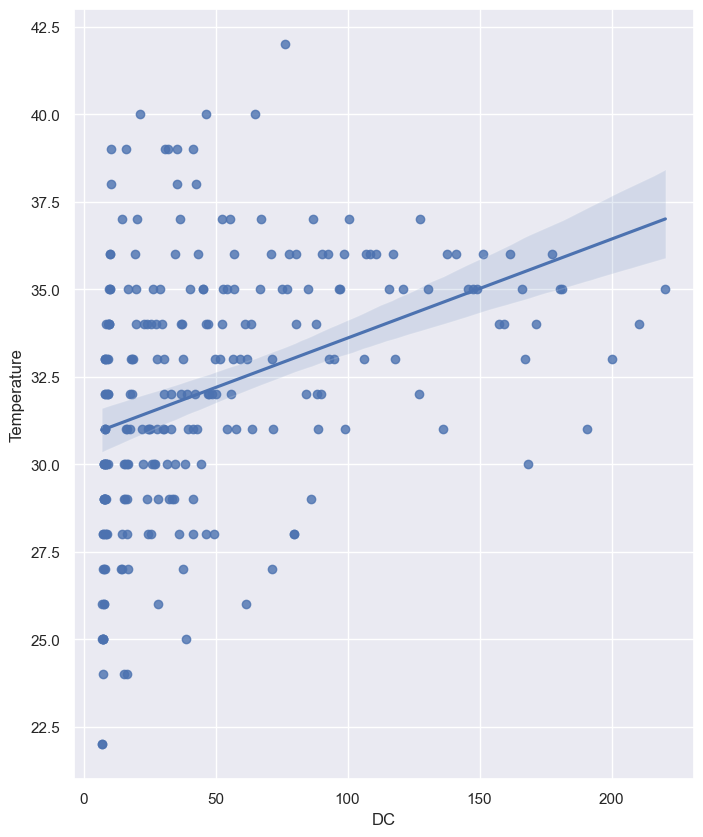

In [119]:
#dc vs temperature
sns.regplot(x='DC', y='Temperature', data = df)

<AxesSubplot:xlabel='ISI', ylabel='Temperature'>

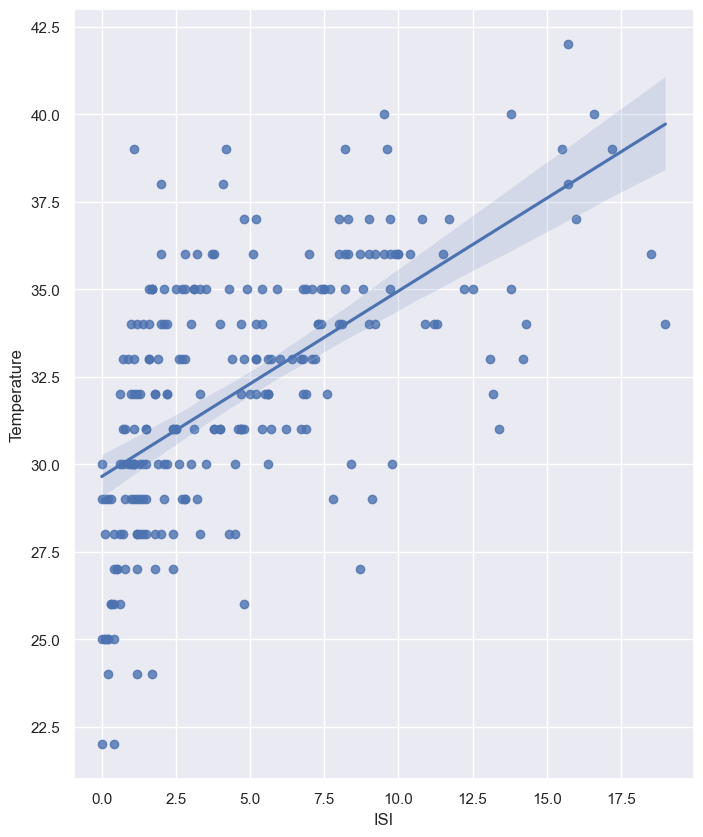

In [120]:
#ISI vs temperature
sns.regplot(x='ISI', y='Temperature', data = df)

<AxesSubplot:xlabel='BUI', ylabel='Temperature'>

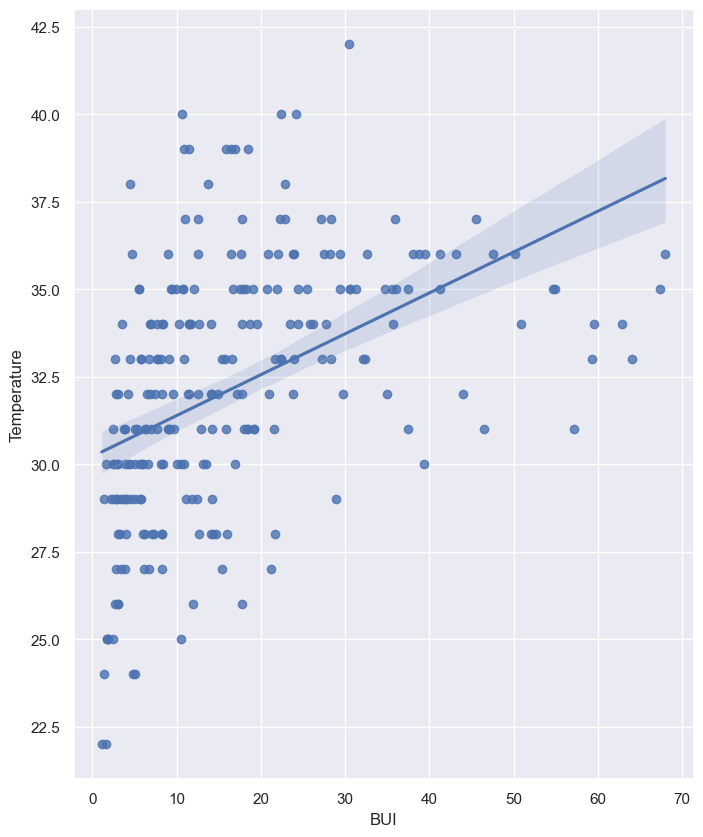

In [121]:
#BUI vs temperature
sns.regplot(x='BUI', y='Temperature', data = df)

<AxesSubplot:xlabel='FWI', ylabel='Temperature'>

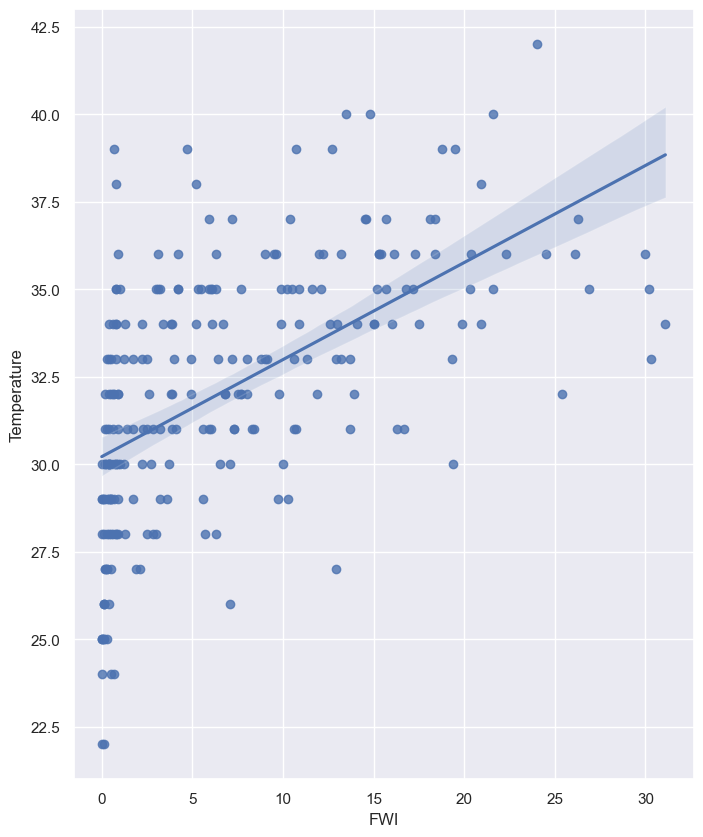

In [122]:
#FWI vs temperature
sns.regplot(x='FWI', y='Temperature', data = df)

<AxesSubplot:xlabel='Classes_new', ylabel='Temperature'>

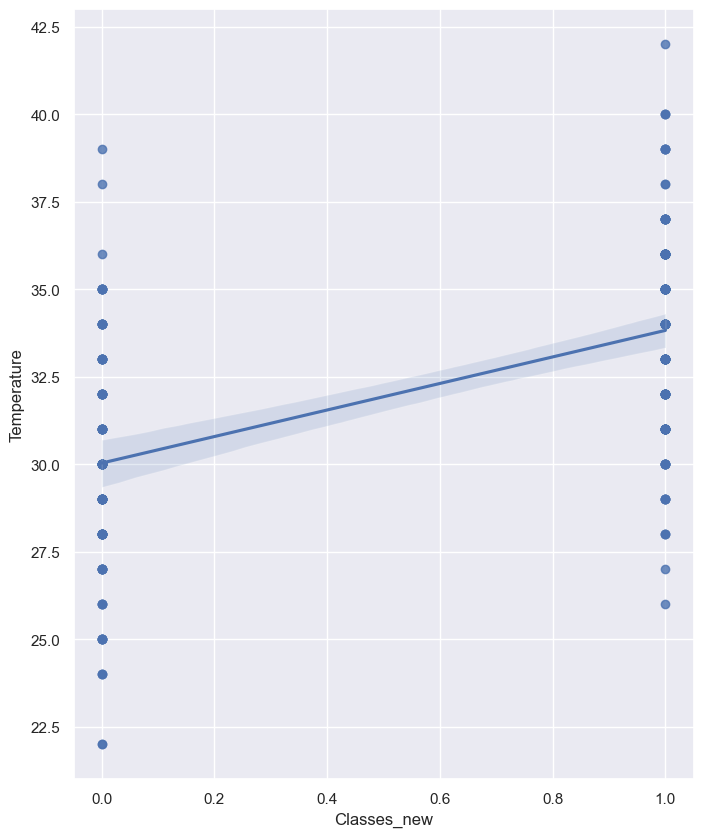

In [123]:
#Classes vs temperature
sns.regplot(x='Classes_new', y='Temperature', data = df)

In [124]:
df.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI   Classes  \
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5  not fire   
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4  not fire   
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1  not fire   
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0  not fire   
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5  not fire   

   Classes_new       date  
0            0 2012-06-01  
1            0 2012-06-02  
2            0 2012-06-03  
3            0 2012-06-04  
4            0 2012-06-05

In [ ]:
Independent and Dependent Feature seperation

In [128]:
df.iloc[:,[1,2,3,4,5,6,7,8,9,11]]

RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  Classes_new
0    57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5            0
1    61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4            0
2    82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1            0
3    89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0            0
4    77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5            0
..   ..  ..   ...   ...   ...   ...  ...   ...  ...          ...
239  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5            1
240  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0            0
241  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2            0
242  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7            0
243  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5            0

[244 rows x 10 columns]

In [129]:
#independent feature
X = df.iloc[:,[1,2,3,4,5,6,7,8,9,11]]

In [130]:
X.head()

RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  Classes_new
0  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5            0
1  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4            0
2  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1            0
3  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0            0
4  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5            0

In [127]:
y=df.iloc[:,0]
y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temperature, dtype: int64

In [ ]:
#splitting data into train and test

In [131]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [132]:
X_train.shape

(163, 10)

In [133]:
y_train.shape

(163,)

In [134]:
X_test.shape

(81, 10)

In [135]:
y_test.shape

(81,)

# Standardizing / Feature Scaling

In [137]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [138]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [139]:
X_train

array([[-0.60257784, -1.68484146, -0.17054229, ..., -0.47763563,
        -0.8196431 , -1.04390785],
       [ 0.14460201, -0.93856657, -0.39436188, ..., -0.3471914 ,
        -0.08219052,  0.95793896],
       [-1.41768313,  2.04653297, -0.39436188, ...,  0.09906517,
         1.36540157,  0.95793896],
       ...,
       [ 0.89178186,  0.5539832 ,  2.82864022, ..., -1.01314351,
        -0.90158227, -1.04390785],
       [-0.39880152,  0.18084575, -0.39436188, ..., -0.058841  ,
         0.31384882,  0.95793896],
       [ 0.9597073 ,  2.04653297,  0.41138865, ..., -0.9719506 ,
        -0.87426921, -1.04390785]])

In [140]:
X_test

array([[ 2.63611698e-01, -1.58418828e-01, -3.79941323e-01,
         4.94929975e-01, -5.55412949e-02,  3.16450964e-01,
         1.16557214e-01,  1.04365998e-01,  8.64078289e-02,
         7.26843784e-01],
       [-4.05747159e-01, -8.16466268e-01, -3.79941323e-01,
         6.07329960e-01, -4.24018114e-01, -4.45183001e-01,
         2.88214202e-01, -4.50217151e-01, -7.26611288e-02,
         7.26843784e-01],
       [-8.07362473e-01,  1.70604892e-01, -3.79941323e-01,
         5.62369966e-01, -5.95402682e-01, -7.35656015e-01,
         3.86303910e-01, -6.82542525e-01, -1.78707101e-01,
         7.26843784e-01],
       [-4.72683044e-01,  4.99628612e-01, -1.35693330e-02,
         7.86337344e-03,  5.01458549e-01,  2.26971044e+00,
        -6.19115592e-01,  1.02617312e+00, -2.44985833e-01,
         7.26843784e-01],
       [-1.27591367e+00, -1.80353743e+00, -3.06666925e-01,
         8.92076589e-01,  6.64273887e-01,  3.46184422e-01,
         1.04840944e+00,  5.46533644e-01,  9.34775603e-01,
         7.

# Model Training

In [141]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression

LinearRegression()

In [142]:
regression.fit(X_train,y_train)

LinearRegression()

In [143]:
#coefficient
regression.coef_

array([-1.04986953, -0.48129664,  0.11958695,  1.82454037,  0.93457062,
        0.67775812,  0.17240097, -1.24784751,  0.05578247, -0.23947047])

In [144]:
#intercept
regression.intercept_

31.98159509202454

In [145]:
#Prediction
reg_prediction= regression.predict(X_test)
reg_prediction

array([32.52186144, 33.5985798 , 33.40697859, 32.68210124, 36.01241367,
       31.76813654, 34.69609059, 26.38564801, 30.24454322, 28.73719762,
       28.79852967, 32.77574562, 33.27269321, 32.63467925, 33.85646155,
       31.64032415, 36.63296164, 24.05891013, 31.73765346, 32.95710841,
       30.35340293, 27.63848165, 34.44622448, 27.9282817 , 35.99319303,
       25.89387482, 32.16697402, 32.79904951, 32.45201263, 34.2403271 ,
       33.93329794, 30.87810874, 32.2227142 , 32.91951509, 32.08945165,
       32.61585218, 29.84901095, 33.63448333, 31.23029441, 23.04302159,
       33.02035609, 33.10338703, 31.90009901, 23.75029608, 35.65163757,
       31.94473355, 30.65208349, 29.67753103, 34.80078933, 34.06675206,
       36.588748  , 30.36425707, 30.37512687, 33.93692039, 33.48405356,
       31.78859814, 36.50362566, 31.76695348, 29.43613235, 35.9704939 ,
       32.68067606, 29.34298462, 33.51827127, 31.4521314 , 31.25443902,
       24.00891295, 32.69408988, 30.11282208, 36.34785002, 34.09

Text(0, 0.5, 'test prediction data')

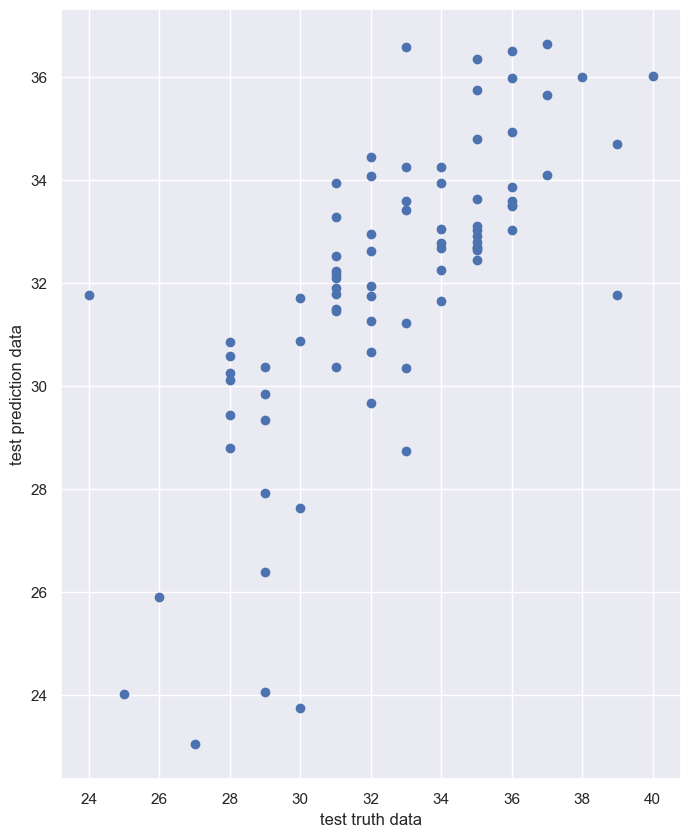

In [146]:
#Relationship between y_test and reg_prediction is linear

plt.scatter(y_test, reg_prediction)
plt.xlabel("test truth data")
plt.ylabel("test prediction data")

In [147]:
#residuals = Normal distribution
residuals = y_test - reg_prediction
residuals

24    -1.521861
6     -0.598580
153   -0.406979
211    2.317899
198    3.987586
         ...   
180    0.948459
5     -0.494475
56     1.071446
125   -1.699643
148    2.408697
Name: Temperature, Length: 81, dtype: float64

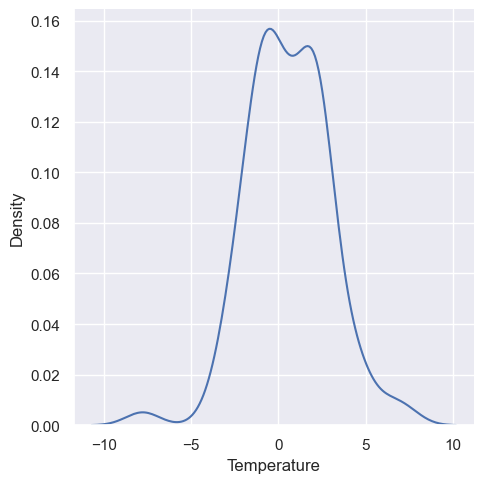

In [149]:
sns.displot(residuals, kind='kde')

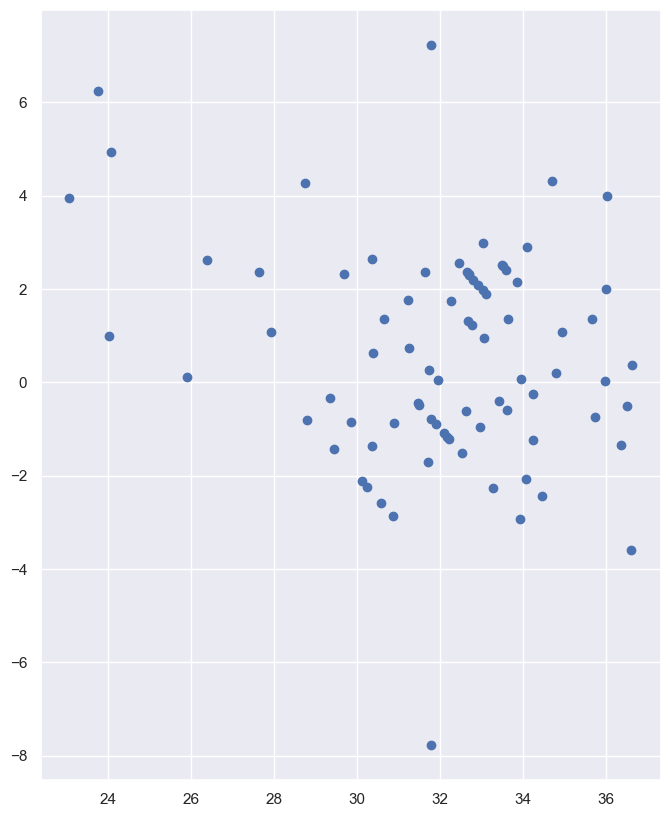

In [150]:
# Uniform distribution for prediction and residuals using scatter plot

plt.scatter(reg_prediction,residuals)


Mean_Squared_error, Mean_absolute_error, Root_Mean_SQaure_Error

In [152]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,reg_prediction)



5.7201716630833985

In [153]:
mean_absolute_error(y_test,reg_prediction)

1.8711584367040655

In [154]:
np.sqrt(mean_squared_error(y_test,reg_prediction))

2.391688036321501

Performance Metrics

In [155]:
#R squared
from sklearn.metrics import r2_score

linear_score = r2_score(y_test,reg_prediction)
linear_score

0.46743229343706305

In [156]:
#Adjusted R Squared
1-(1-linear_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3913511924995007

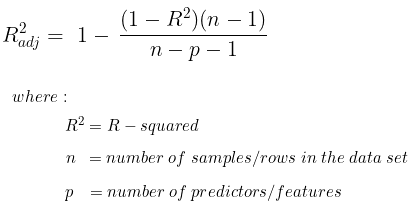

# Ridge Regression Implementation

In [158]:
#Train the model
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [159]:
#Coefficient and Intercept
ridge.coef_

array([-1.06328063, -0.48315341,  0.10250436,  1.76886014,  0.46035832,
        0.42838257,  0.21881839, -0.49193241, -0.01847088, -0.22960873])

In [160]:
ridge.intercept_

31.98159509202454

In [161]:
#Prediction
ridge_prediction = ridge.predict(X_test)
ridge_prediction

array([32.53003005, 33.57591927, 33.3808934 , 32.65581958, 35.9866599 ,
       31.80537188, 34.67450708, 26.43183304, 30.2683015 , 28.74749672,
       28.79670596, 32.82630151, 33.23934431, 32.64841299, 33.9121481 ,
       31.61626032, 36.55938906, 24.16169752, 31.70524282, 32.92906162,
       30.32106523, 27.64267854, 34.43579356, 27.95322568, 36.01190537,
       25.94041006, 32.17388354, 32.82045195, 32.42985422, 34.18568557,
       33.9361435 , 30.84733354, 32.21338938, 32.97595763, 32.07429309,
       32.62894239, 29.79360666, 33.6561548 , 31.14545057, 23.09515367,
       33.03893817, 33.09653312, 31.91297372, 23.83674608, 35.59186591,
       31.92185059, 30.63757015, 29.71079833, 34.77753734, 34.0554463 ,
       36.55148921, 30.33757951, 30.38842146, 34.01599016, 33.47116426,
       31.92142369, 36.5174502 , 31.75144907, 29.43472807, 35.96846408,
       32.63883693, 29.34691606, 33.46472912, 31.42555307, 31.27291078,
       24.03596475, 32.69324228, 30.10116621, 36.33600369, 34.13

Assumptions for Ridge Regression

In [ ]:
# 1. Linear Regression between y_test and predicted y

Text(0, 0.5, 'test predicted data')

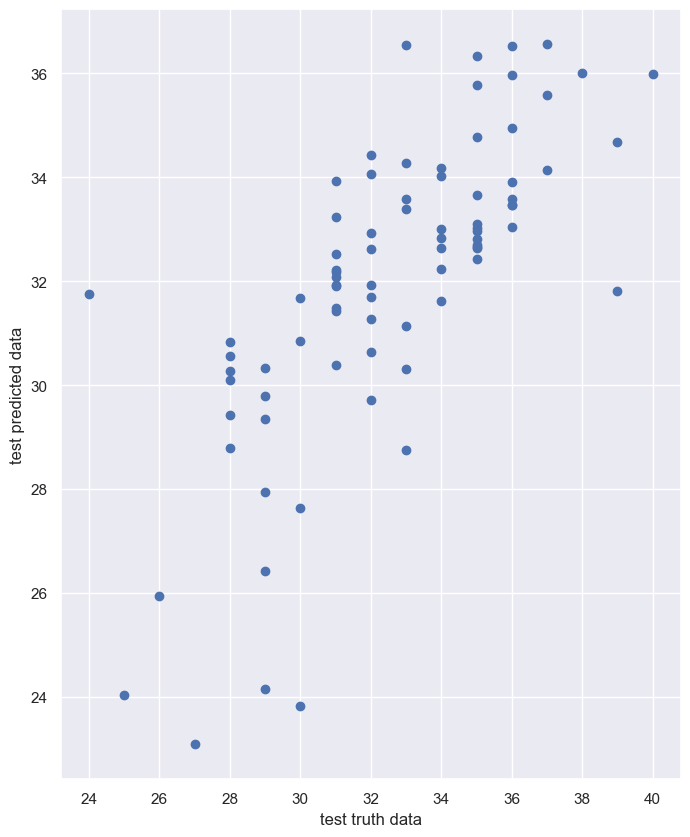

In [163]:
plt.scatter(y_test,ridge_prediction)
plt.xlabel("test truth data")
plt.ylabel("test predicted data")

In [164]:
# 2. residuals 
residuals = y_test-ridge_prediction
residuals

24    -1.530030
6     -0.575919
153   -0.380893
211    2.344180
198    4.013340
         ...   
180    1.000221
5     -0.484607
56     1.047700
125   -1.673459
148    2.425427
Name: Temperature, Length: 81, dtype: float64

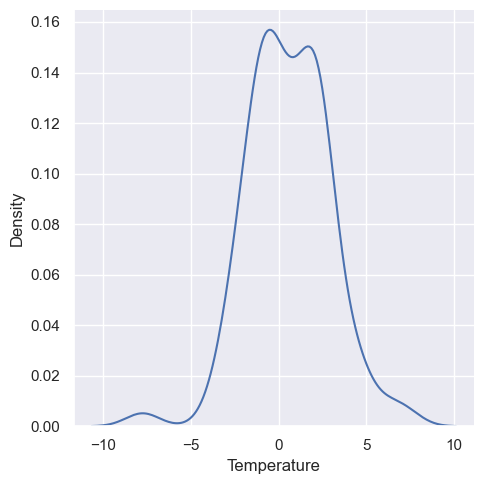

In [165]:
sns.displot(residuals,kind ='kde')

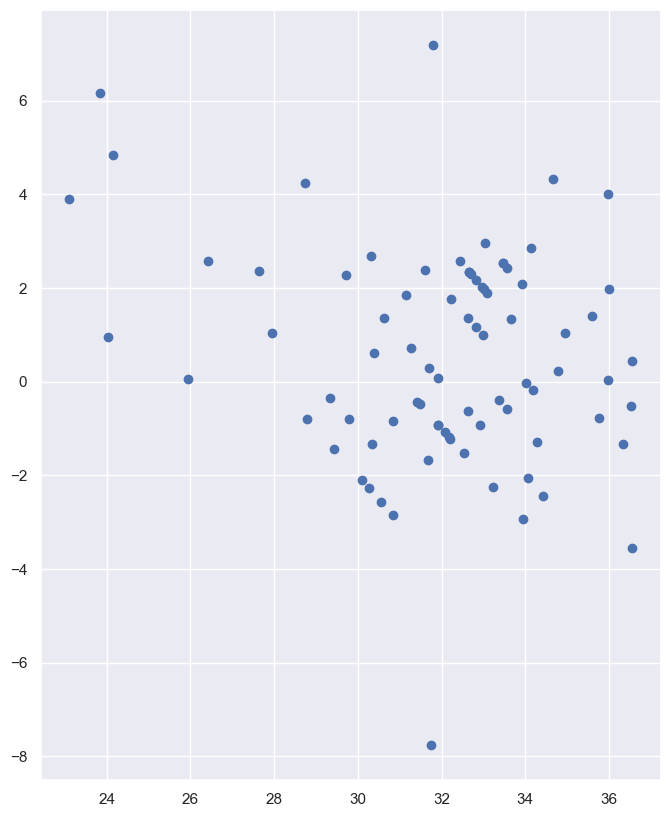

In [166]:
# Uniform distribution
plt.scatter(ridge_prediction,residuals)

# Performance Metrics


In [168]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mean_squared_error(y_test,ridge_prediction)


5.673701479343302

In [169]:
mean_absolute_error(y_test,ridge_prediction)

1.865785968274494

In [170]:
np.sqrt(mean_squared_error(y_test,ridge_prediction))

2.381953290755993

R Square

In [171]:
from sklearn.metrics import r2_score
ridge_score=r2_score(y_test,ridge_prediction)
ridge_score

0.4717588277852788

Adjusted R Square

In [172]:
1-(1-ridge_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3962958031831758

# Lasso Regression

In [173]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [174]:
#Coefficient and Intercept
lasso.coef_

array([-0.62324302, -0.        , -0.        ,  1.25581509,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [175]:
lasso.intercept_

31.98159509202454

In [176]:
#Prediction
lasso_prediction = lasso.predict(X_test)
lasso_prediction

array([32.43884147, 32.99716831, 33.19101081, 32.28606644, 33.89708262,
       31.22492054, 33.72644079, 28.19547317, 30.54269925, 29.54144129,
       30.61138978, 32.01160815, 32.41373344, 31.89868527, 33.04014314,
       32.12266585, 34.28038743, 26.63432704, 31.9517202 , 32.76724619,
       31.23372312, 29.24000979, 33.3186778 , 29.75002791, 34.31677088,
       28.07314005, 32.19009887, 32.50878952, 32.59283182, 33.58905973,
       32.91781002, 30.75063601, 32.44825171, 32.48589267, 32.17440108,
       32.28229391, 30.9959521 , 32.92626658, 30.52730528, 27.63996519,
       32.40965707, 32.57370751, 32.18537266, 26.74724991, 33.92938971,
       32.21143438, 31.53203194, 30.38051397, 33.84092501, 33.16937147,
       34.0827724 , 31.42474677, 31.43918705, 32.64586675, 33.13298803,
       31.77010679, 34.57648506, 32.19729792, 30.52479025, 34.09907785,
       32.81147853, 30.66564002, 32.97960534, 31.86984689, 31.70232774,
       27.21117052, 32.71329977, 31.33159805, 34.03164483, 33.77

Text(0, 0.5, 'test predict data')

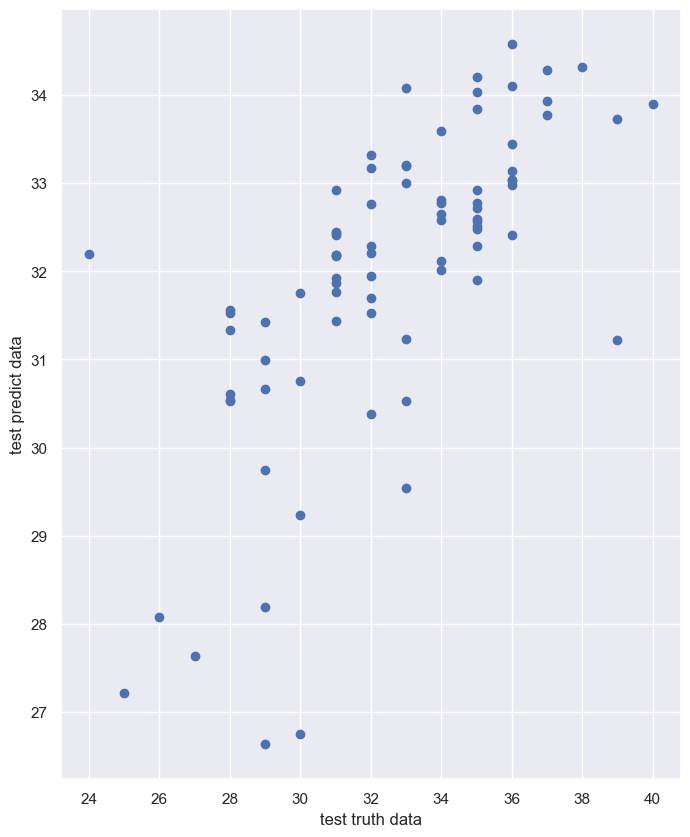

In [177]:
#Assumptions
plt.scatter(y_test,lasso_prediction)
plt.xlabel("test truth data")
plt.ylabel("test predict data")

In [178]:
#residuals
residuals = y_test -lasso_prediction
residuals

24    -1.438841
6      0.002832
153   -0.191011
211    2.713934
198    6.102917
         ...   
180    1.220829
5     -0.927870
56     2.554913
125   -1.751894
148    2.959857
Name: Temperature, Length: 81, dtype: float64

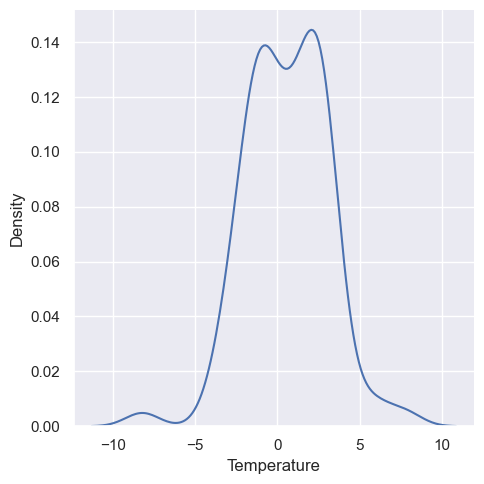

In [179]:
sns.displot(residuals,kind='kde')

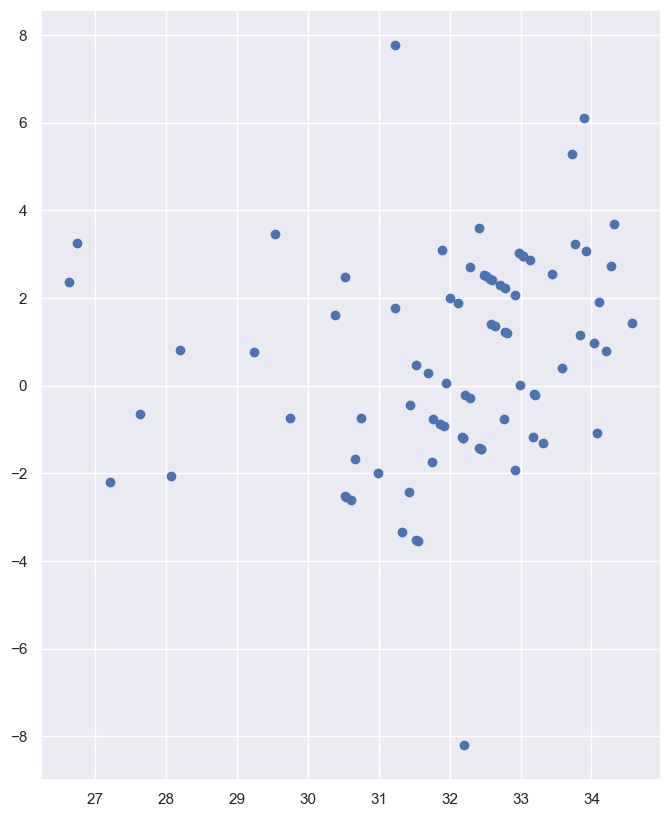

In [180]:
plt.scatter(lasso_prediction,residuals)

In [182]:
#Performance metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mean_absolute_error(y_test,lasso_prediction)


2.020105777683241

In [184]:
mean_squared_error(y_test,lasso_prediction)

6.318032003708961

In [185]:
np.sqrt(mean_squared_error(y_test,lasso_prediction))

2.513569574073684

In [186]:
#R square

from sklearn.metrics import r2_score
lasso_score = r2_score(y_test,lasso_prediction)
lasso_score

0.4117694341374416

In [187]:
#Adjusted R square
1-(1-lasso_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3277364961570761

# Elasticnet Regression

In [189]:
from sklearn.linear_model import ElasticNet
elas_net = ElasticNet()
elas_net.fit(X_train,y_train)

ElasticNet()

In [190]:
#coefficient and intercept
elas_net.coef_

array([-0.68808933, -0.10544712, -0.00834786,  0.85162206,  0.10376148,
        0.        ,  0.23158765,  0.02547021,  0.15362153,  0.07372069])

In [191]:
elas_net.intercept_

31.98159509202454

In [192]:
#Prediction
elastic_pred = elas_net.predict(X_test)
elastic_pred

array([32.3323224 , 32.92097077, 33.03767018, 32.21170648, 34.33481774,
       31.10149042, 33.84673257, 28.42552632, 30.27374996, 29.56025051,
       29.98668995, 31.81589486, 32.06256521, 31.66159277, 33.49774717,
       31.90181701, 35.27157099, 27.22530167, 31.76176257, 32.56686448,
       30.62571607, 29.12989473, 33.32999975, 29.58037307, 35.03056763,
       28.28138877, 32.00711584, 32.49986089, 32.28428185, 33.83903954,
       32.95891288, 30.67007104, 32.37451984, 32.70705831, 31.68724702,
       31.9443192 , 30.40609478, 32.89158526, 30.48941262, 27.43399736,
       32.40315873, 32.41528881, 31.76795858, 27.19192716, 34.35688325,
       32.04453114, 31.34120742, 30.23785756, 33.94771179, 33.23980228,
       35.26441536, 30.9921278 , 31.21620407, 33.24544161, 33.28090301,
       31.93038921, 35.73282303, 31.58930532, 30.32550574, 34.52976712,
       32.73535773, 30.31807408, 33.14206394, 31.56945615, 31.29232291,
       27.36973307, 32.64115896, 31.00049087, 35.02003633, 33.81

Text(0, 0.5, 'test predicted data')

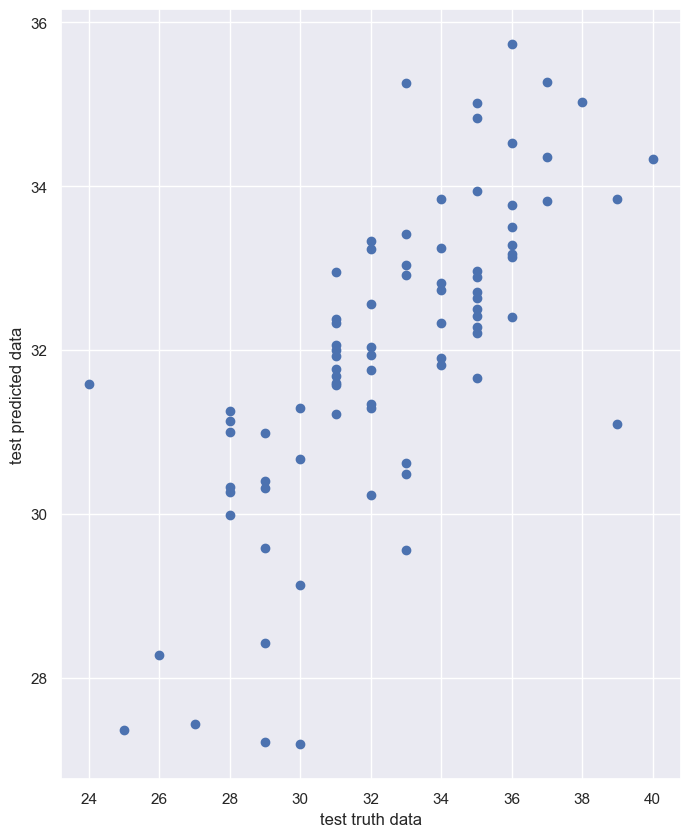

In [193]:
plt.scatter(y_test,elastic_pred)
plt.xlabel("test truth data")
plt.ylabel("test predicted data")

In [194]:
residuals = y_test - elastic_pred
residuals

24    -1.332322
6      0.079029
153   -0.037670
211    2.788294
198    5.665182
         ...   
180    1.185872
5     -0.603141
56     2.228426
125   -1.292434
148    2.831727
Name: Temperature, Length: 81, dtype: float64

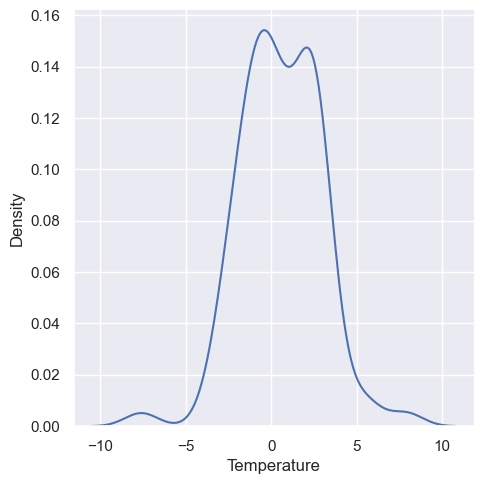

In [195]:
sns.displot(residuals,kind='kde')

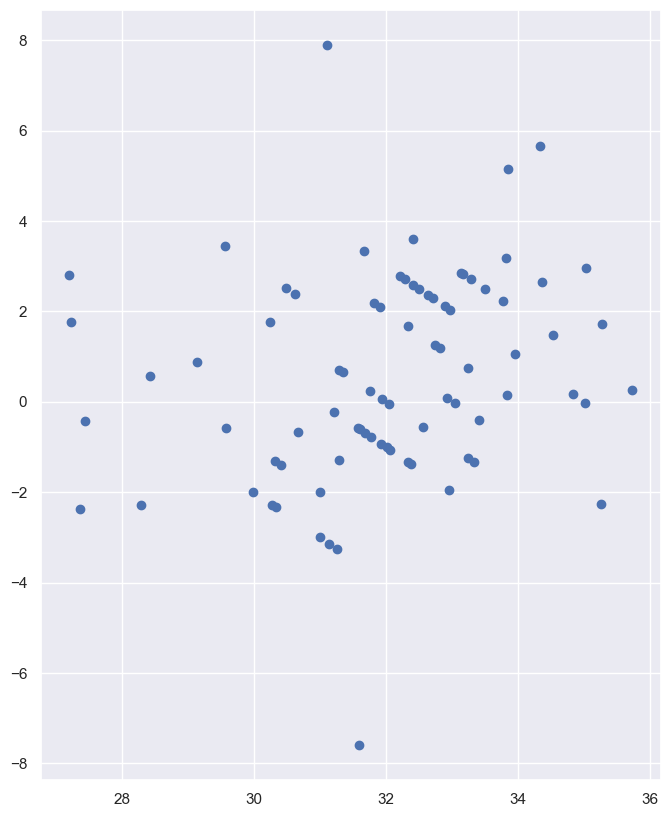

In [196]:
plt.scatter(elastic_pred,residuals)


In [197]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_squared_error(y_test,elastic_pred)


5.669636061983656

In [198]:
mean_absolute_error(y_test,elastic_pred)

1.8663469623473894

In [199]:

np.sqrt(mean_squared_error(y_test,elastic_pred))

2.381099758931502

In [200]:
from sklearn.metrics import r2_score
elastic_score = r2_score(y_test,elastic_pred)
print(elastic_score)

0.4721373321601424


In [201]:
1 - (1-elastic_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.39672837961159135